In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics


# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [4]:
data = pd.read_excel('/Users/janarthananm/Documents/ChurnProject/Notebook/Data/Customer Churn Data.xlsx')

In [5]:
data.head()


AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4      3.000            6.000   Debit Card  Female   
1      20001      1      0      1.000            8.000          UPI    Male   
2      20002      1      0      1.000           30.000   Debit Card    Male   
3      20003      1      0      3.000           15.000   Debit Card    Male   
4      20004      1      0      1.000           12.000  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0          3.000                  3           Super           2.000   
1          3.000                  4    Regular Plus           3.000   
2          2.000                  4    Regular Plus           3.000   
3          2.000                  4           Super           5.000   
4          2.000                  3    Regular Plus           5.000   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9        1.000             11   
1         Single             7        1.000             15   
2         Single             6        1.000             14   
3         Single             8        0.000             23   
4         Single             3        0.000             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5  159.930       Mobile  
1                       0                    0  120.900       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3  134.070       Mobile  
4                       1                    3  129.600       Mobile

In [8]:
data.shape

(11260, 19)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [10]:
data.describe()

AccountID     Churn  City_Tier  CC_Contacted_LY  Service_Score  \
count  11260.000 11260.000  11148.000        11158.000      11162.000   
mean   25629.500     0.168      1.654           17.867          2.903   
std     3250.626     0.374      0.915            8.853          0.726   
min    20000.000     0.000      1.000            4.000          0.000   
25%    22814.750     0.000      1.000           11.000          2.000   
50%    25629.500     0.000      1.000           16.000          3.000   
75%    28444.250     0.000      3.000           23.000          3.000   
max    31259.000     1.000      3.000          132.000          5.000   

       CC_Agent_Score  Complain_ly  
count       11144.000    10903.000  
mean            3.066        0.285  
std             1.380        0.452  
min             1.000        0.000  
25%             2.000        0.000  
50%             3.000        0.000  
75%             4.000        1.000  
max             5.000        1.000

In [11]:
data.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [12]:
cols_to_convert = ['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 
                   'coupon_used_for_payment', 'Day_Since_CC_connect']


data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [13]:
data['cashback'] = pd.to_numeric(data['cashback'], errors='coerce')

In [14]:
data.describe()

AccountID     Churn    Tenure  City_Tier  CC_Contacted_LY  \
count  11260.000 11260.000 11042.000  11148.000        11158.000   
mean   25629.500     0.168    11.025      1.654           17.867   
std     3250.626     0.374    12.880      0.915            8.853   
min    20000.000     0.000     0.000      1.000            4.000   
25%    22814.750     0.000     2.000      1.000           11.000   
50%    25629.500     0.000     9.000      1.000           16.000   
75%    28444.250     0.000    16.000      3.000           23.000   
max    31259.000     1.000    99.000      3.000          132.000   

       Service_Score  Account_user_count  CC_Agent_Score  rev_per_month  \
count      11162.000           10816.000       11144.000      10469.000   
mean           2.903               3.693           3.066          6.363   
std            0.726               1.023           1.380         11.910   
min            0.000               1.000           1.000          1.000   
25%            2.000               3.000           2.000          3.000   
50%            3.000               4.000           3.000          5.000   
75%            3.000               4.000           4.000          7.000   
max            5.000               6.000           5.000        140.000   

       Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
count    10903.000       11257.000                11257.000   
mean         0.285          16.193                    1.791   
std          0.452           3.758                    1.970   
min          0.000           4.000                    0.000   
25%          0.000          13.000                    1.000   
50%          0.000          15.000                    1.000   
75%          1.000          19.000                    2.000   
max          1.000          28.000                   16.000   

       Day_Since_CC_connect  cashback  
count             10902.000 10787.000  
mean                  4.633   196.236  
std                   3.698   178.661  
min                   0.000     0.000  
25%                   2.000   147.210  
50%                   3.000   165.250  
75%                   8.000   200.010  
max                  47.000  1997.000

In [15]:
data['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [16]:
data['Churn'].value_counts(normalize=True)

Churn
0   0.832
1   0.168
Name: proportion, dtype: float64

In [17]:
data['Gender'].value_counts()

Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64

In [18]:
data['Gender'] = data['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [19]:
data.groupby('Gender')['Churn'].mean()

Gender
Female   0.155
Male     0.177
Name: Churn, dtype: float64

In [20]:
data.groupby('Gender')['Churn'].value_counts()

Gender  Churn
Female  0        3759
        1         689
Male    0        5519
        1        1185
Name: count, dtype: int64

In [21]:
data.groupby('Gender')['Churn'].value_counts(normalize=True)

Gender  Churn
Female  0       0.845
        1       0.155
Male    0       0.823
        1       0.177
Name: proportion, dtype: float64

In [22]:
contingency_table = pd.crosstab(data['Gender'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 8.983145746725429
P-value: 0.002724811502034821


In [23]:
data.groupby('Marital_Status')['Churn'].value_counts(normalize=True)

Marital_Status  Churn
Divorced        0       0.854
                1       0.146
Married         0       0.885
                1       0.115
Single          0       0.731
                1       0.269
Name: proportion, dtype: float64

In [24]:
contingency_table = pd.crosstab(data['Marital_Status'], data['Churn'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 379.8081234819416
P-value: 3.355165093920423e-83


In [25]:
data.drop('AccountID', axis=1, inplace=True)

In [26]:
data['Login_device'] = data['Login_device'].replace('&&&&', 'Unknown')

In [27]:
special_chars = {'#', '@', '+', '$', '*'}
data.replace(special_chars, np.nan, inplace=True)


numeric_columns = ['Tenure', 'Account_user_count', 'rev_per_month', 
                   'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


imputer = KNNImputer(n_neighbors=5, weights='uniform')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
integer_columns = ['Tenure', 'Account_user_count', 'Day_Since_CC_connect','coupon_used_for_payment',]
data[integer_columns] = data[integer_columns].round(0).astype(int)

In [28]:
cols_to_impute = ['Tenure', 'Day_Since_CC_connect']
data[cols_to_impute] = data[cols_to_impute].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5, weights='uniform')
data[cols_to_impute] = imputer.fit_transform(data[cols_to_impute])
data[cols_to_impute] = data[cols_to_impute].round(0).astype(int)

In [29]:
cols = data.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(data[i].value_counts())
    print("*" * 30)

Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64
******************************
Gender
Male      6704
Female    4448
Name: count, dtype: int64
******************************
account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64
******************************
Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64
******************************
Login_device
Mobile      7482
Computer    3018
Unknown      539
Name: count, dtype: int64
******************************


In [30]:
data.isnull().sum().sort_values(ascending = False)/data.index.size

cashback                  0.042
Complain_ly               0.032
Login_device              0.020
Marital_Status            0.019
CC_Agent_Score            0.010
City_Tier                 0.010
Payment                   0.010
Gender                    0.010
CC_Contacted_LY           0.009
Service_Score             0.009
account_segment           0.009
Account_user_count        0.000
Tenure                    0.000
rev_per_month             0.000
rev_growth_yoy            0.000
coupon_used_for_payment   0.000
Day_Since_CC_connect      0.000
Churn                     0.000
dtype: float64

In [31]:
columns_to_impute = ['cashback', 'Complain_ly', 'CC_Agent_Score', 
                     'City_Tier', 'CC_Contacted_LY', 'Service_Score']

imputer = KNNImputer(n_neighbors=5, weights='uniform')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])
cols_to_round = ['Complain_ly', 'CC_Agent_Score', 'City_Tier', 'CC_Contacted_LY', 'Service_Score']
data[cols_to_round] = data[cols_to_round].round(0).astype(int)

In [32]:
data.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [33]:
data.drop('Gender', axis=1, inplace=True)

In [34]:
data['account_segment'] = data['account_segment'].replace({'Regular +': 'Regular Plus', 'Super +': 'Super Plus'})

In [35]:
missing = data[data['account_segment'].isnull()]

In [36]:
data.loc[(data['City_Tier'] == 1) & (data['account_segment'].isna()), 'account_segment'] = 'Regular Plus'

In [37]:
data.loc[(data['City_Tier'].isin([2, 3])) & (data['account_segment'].isna()), 'account_segment'] = 'HNI'

In [38]:
data['Login_device'] = data['Login_device'].fillna('Unknown')

In [39]:
data['Marital_Status'].fillna(data['Marital_Status'].mode()[0], inplace=True)

In [40]:
data['Payment'].fillna(data['Payment'].mode()[0], inplace=True)

In [41]:
data.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [42]:
data["Service_Score"] = data["Service_Score"].replace(0, 5)

EDA

In [43]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [44]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [45]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

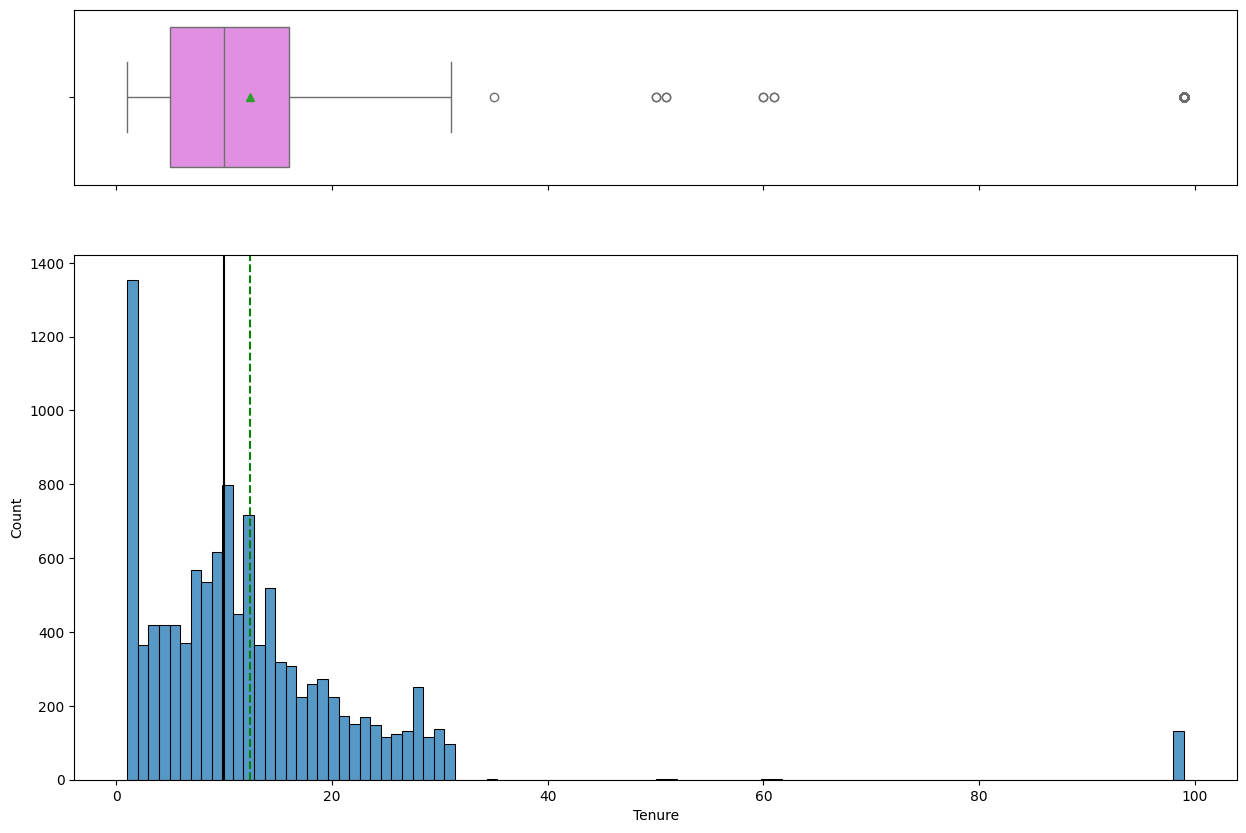

In [46]:
histogram_boxplot(data,'Tenure')

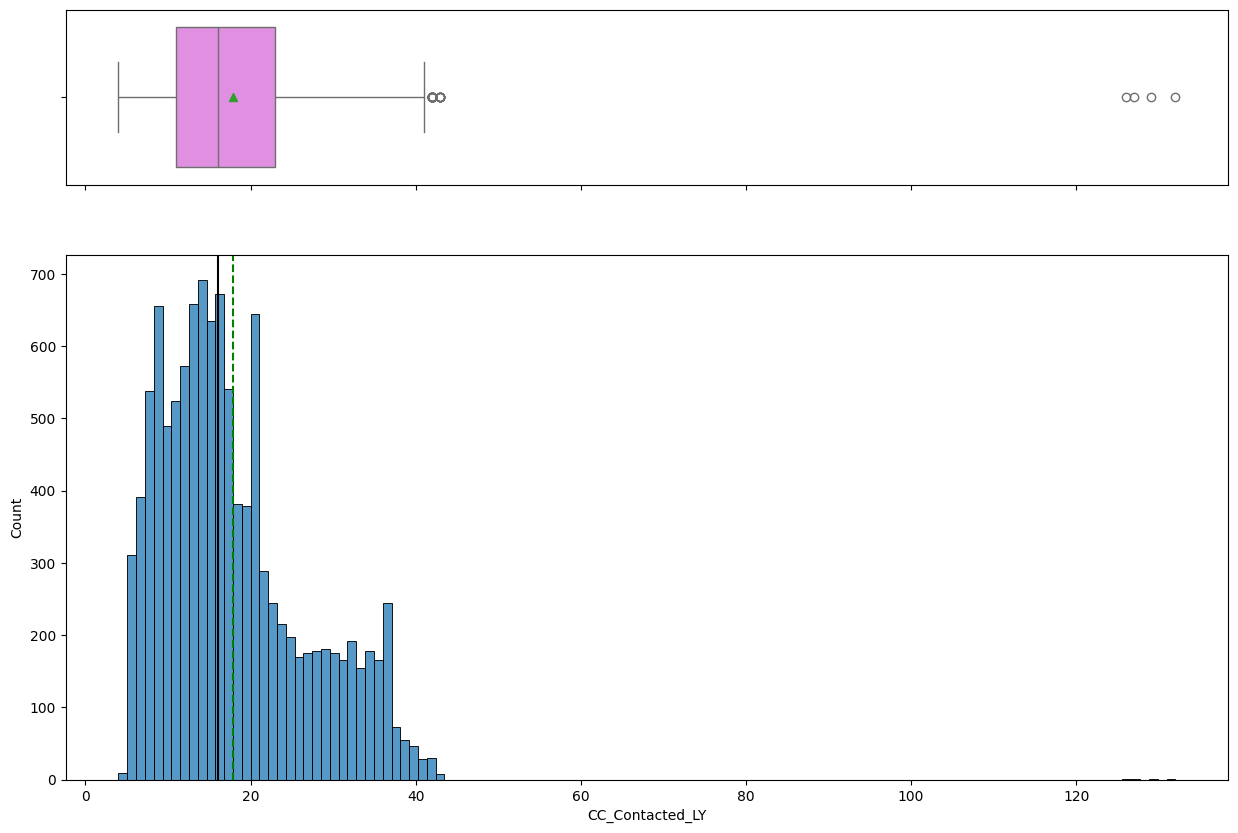

In [47]:
histogram_boxplot(data,'CC_Contacted_LY')

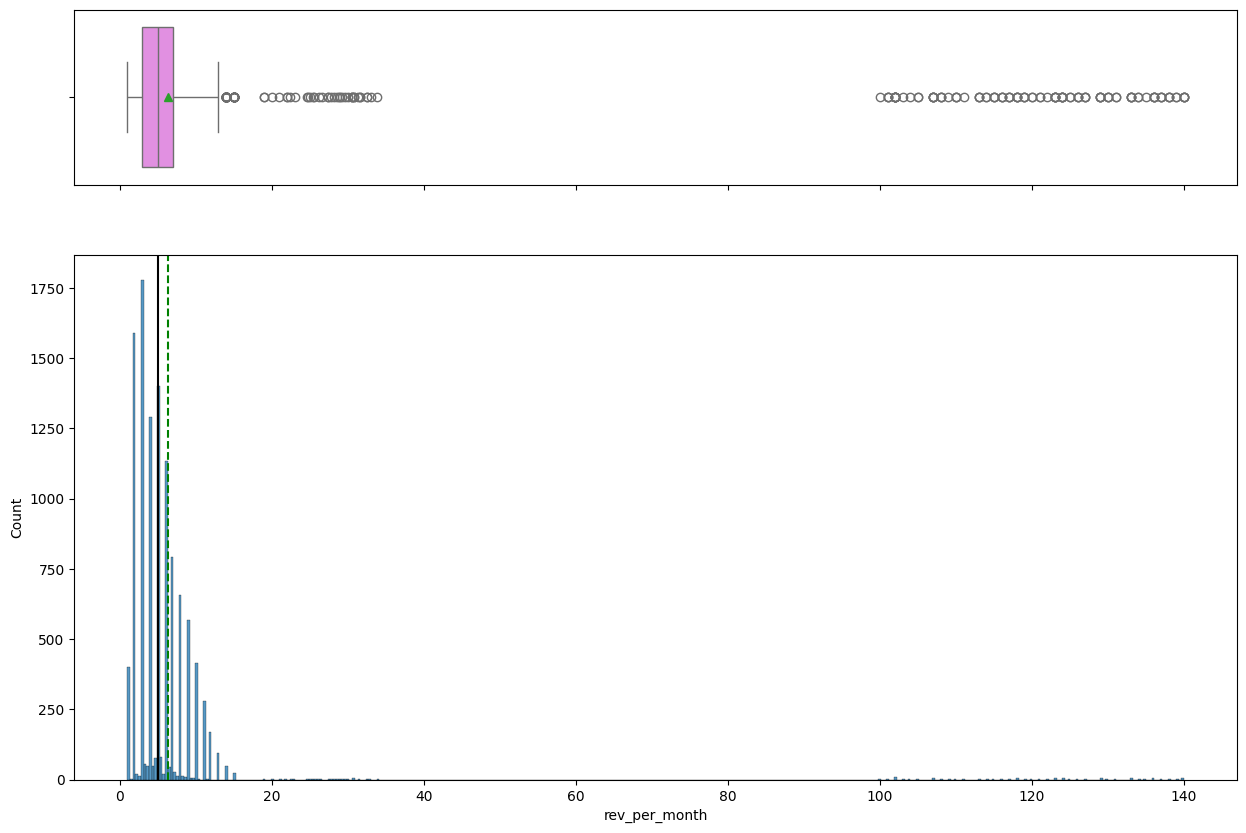

In [48]:
histogram_boxplot(data,'rev_per_month')

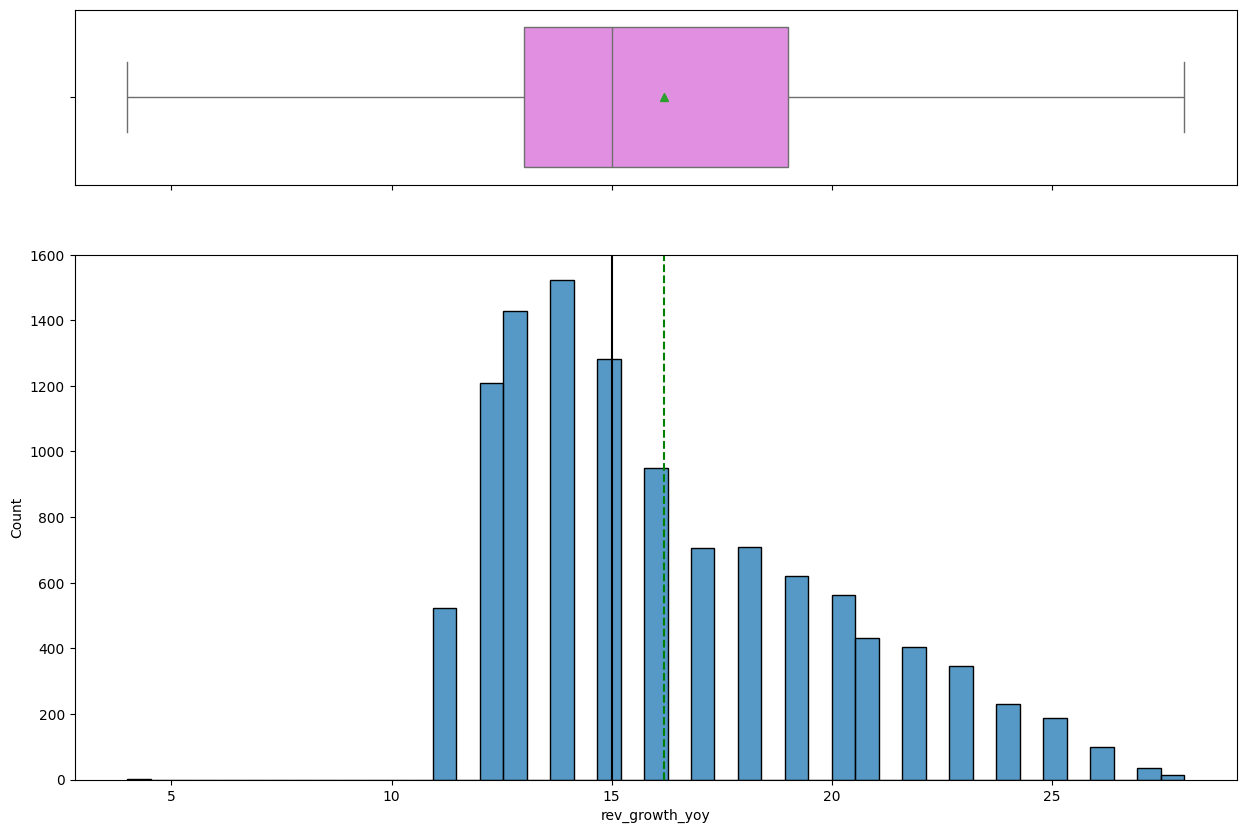

In [49]:
histogram_boxplot(data,'rev_growth_yoy')

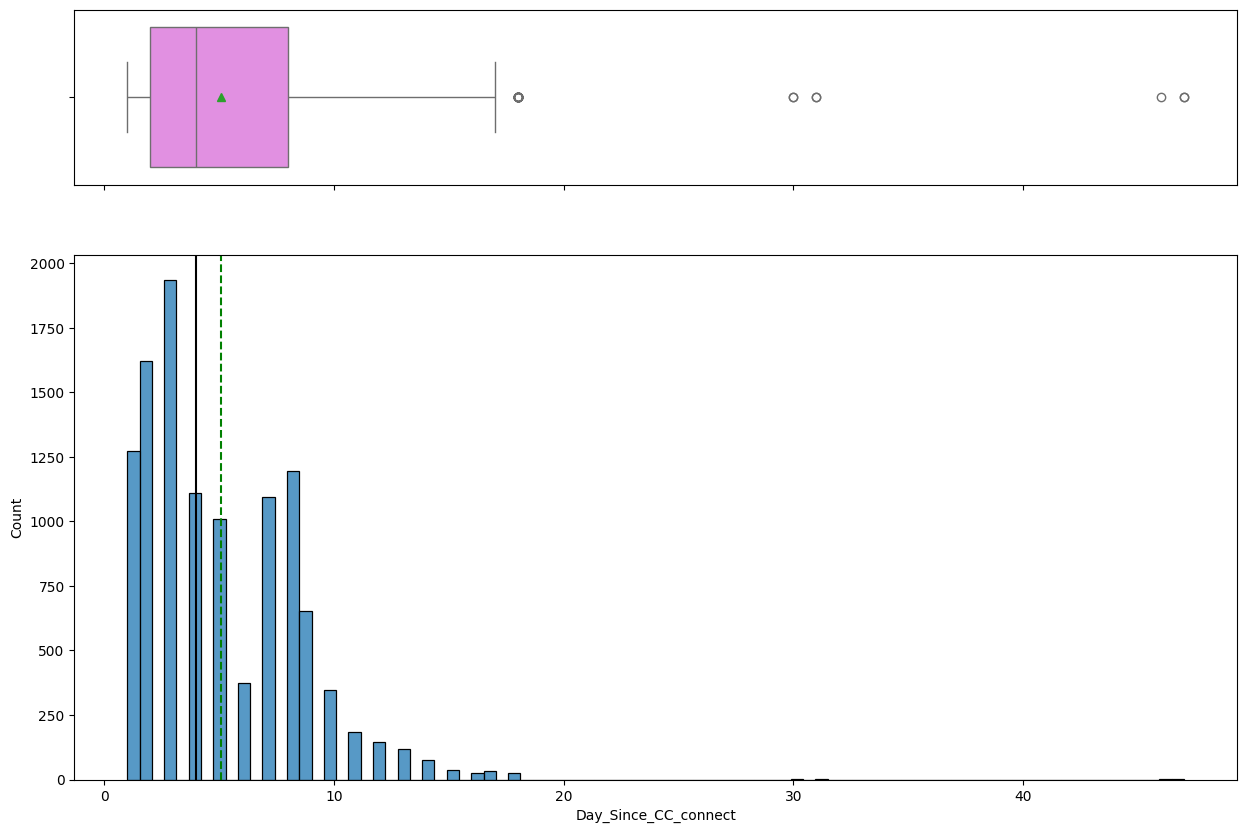

In [50]:
histogram_boxplot(data,'Day_Since_CC_connect')

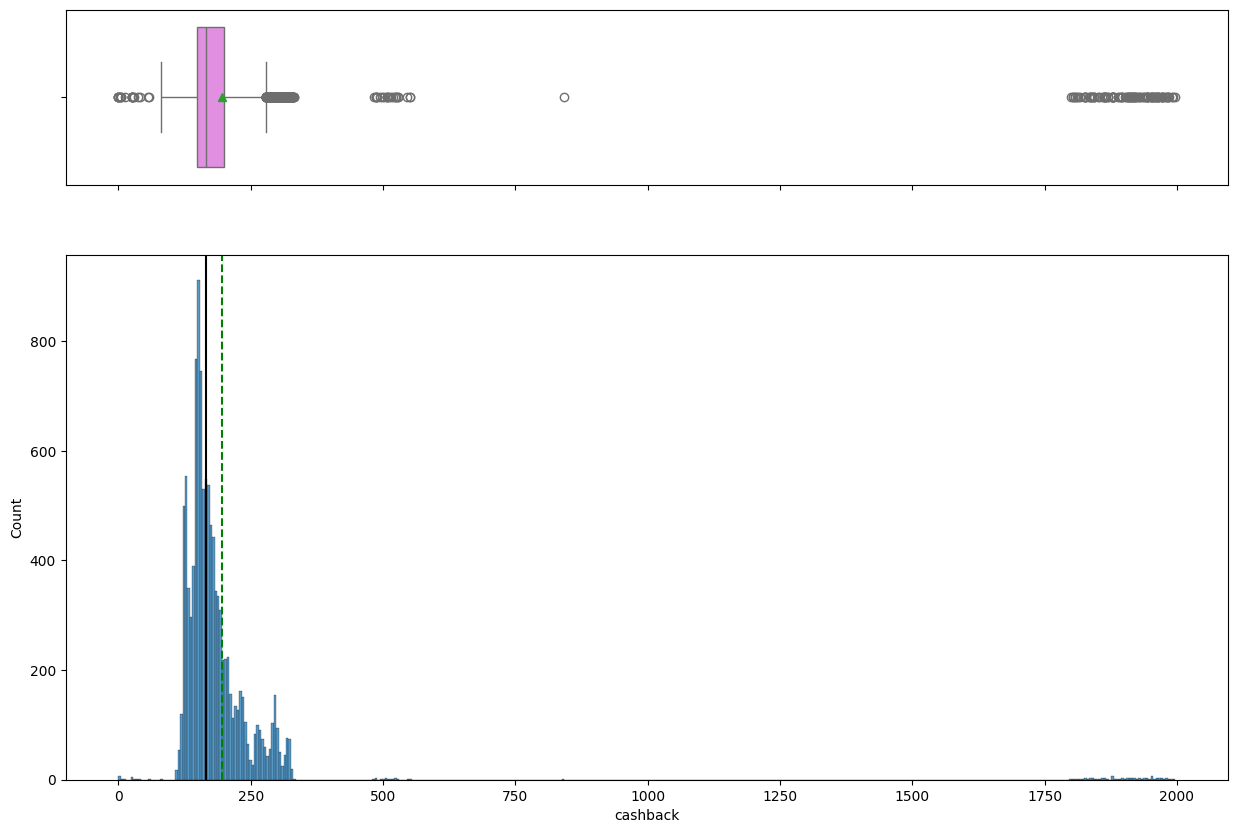

In [51]:
histogram_boxplot(data,'cashback')

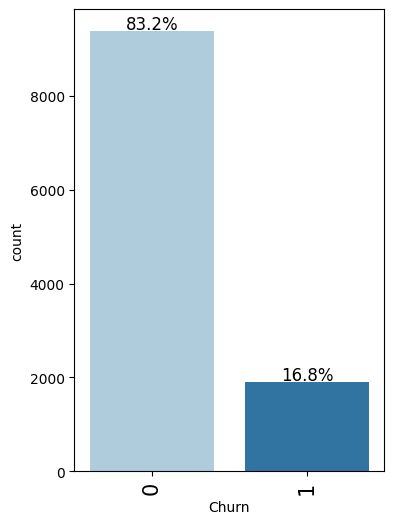

In [52]:
labeled_barplot(data,'Churn',perc=True)

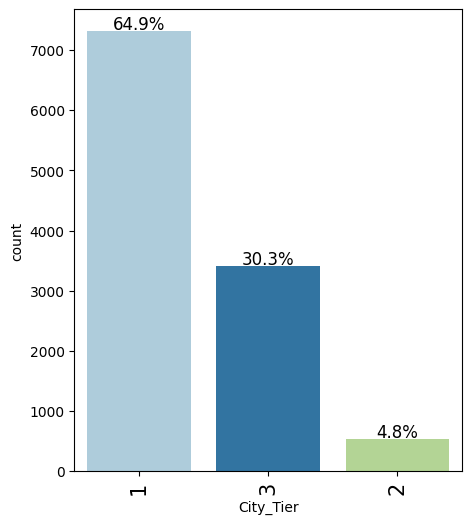

In [53]:
labeled_barplot(data,'City_Tier',perc=True)

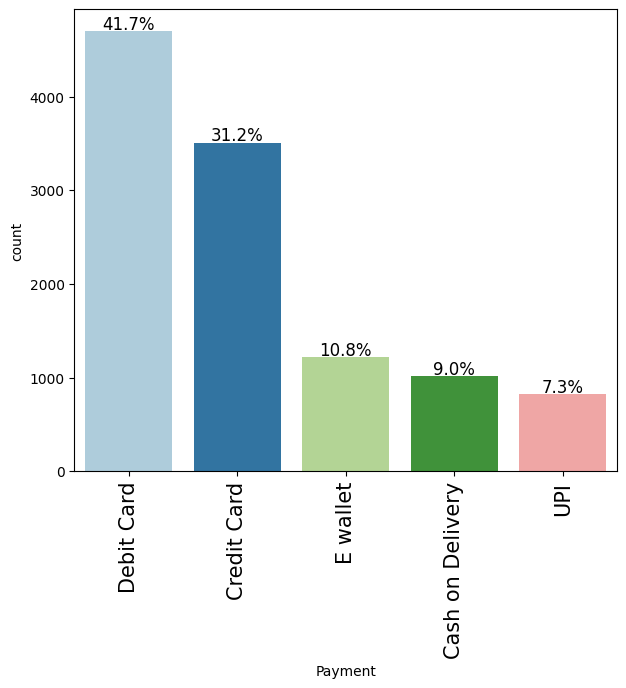

In [54]:
labeled_barplot(data,'Payment',perc=True)

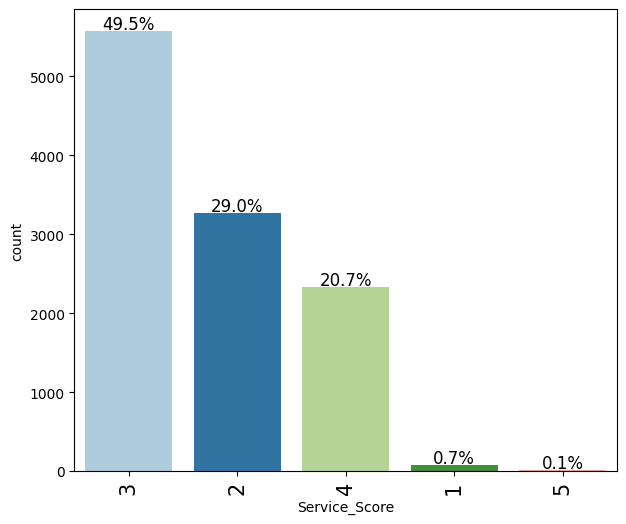

In [55]:
labeled_barplot(data,'Service_Score',perc=True)

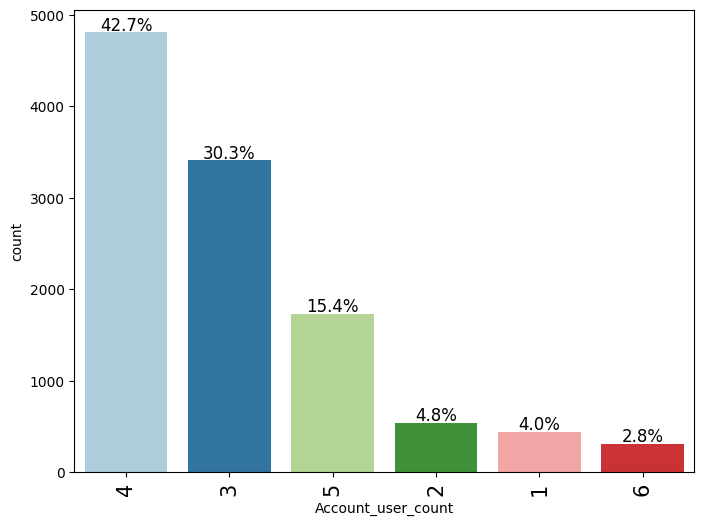

In [56]:
labeled_barplot(data,'Account_user_count',perc=True)

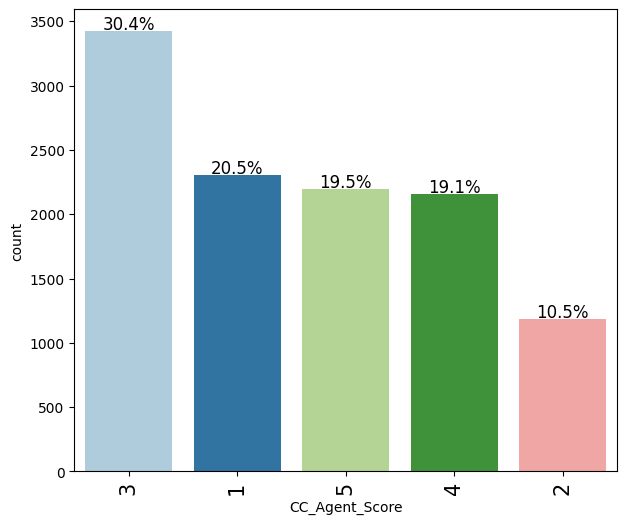

In [57]:
labeled_barplot(data,'CC_Agent_Score',perc=True)

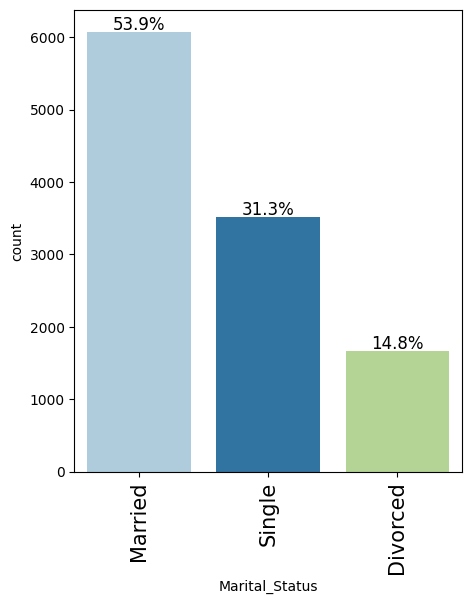

In [58]:
labeled_barplot(data,'Marital_Status',perc=True)

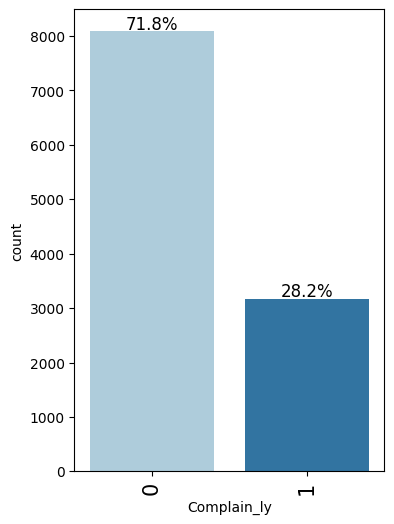

In [59]:
labeled_barplot(data,'Complain_ly',perc=True)

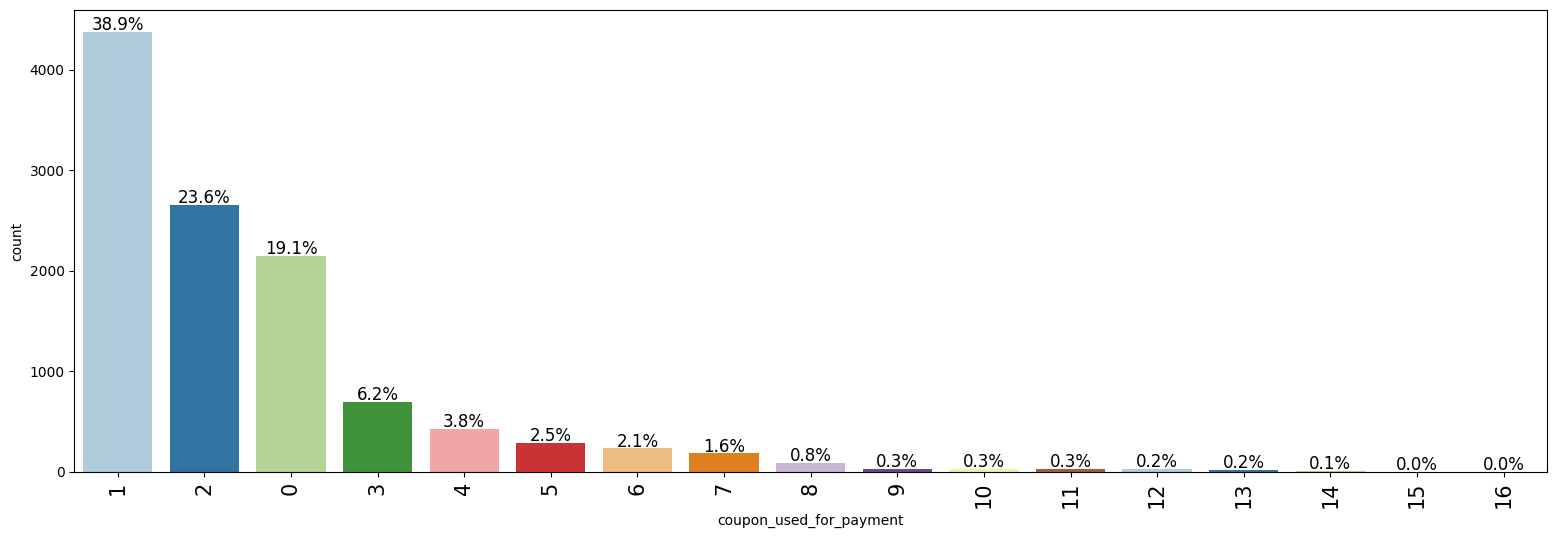

In [60]:
labeled_barplot(data,'coupon_used_for_payment',perc=True)

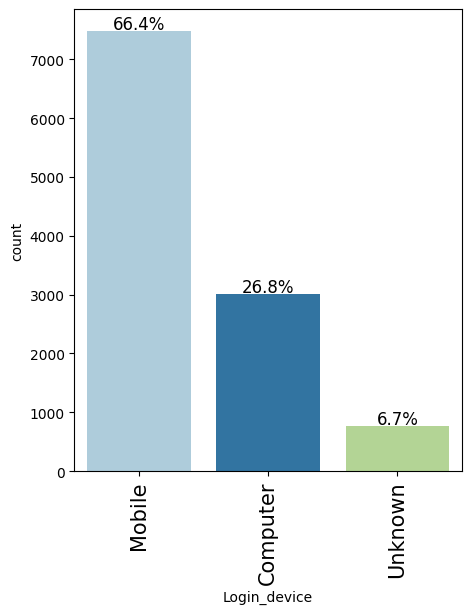

In [61]:
labeled_barplot(data,'Login_device',perc=True)



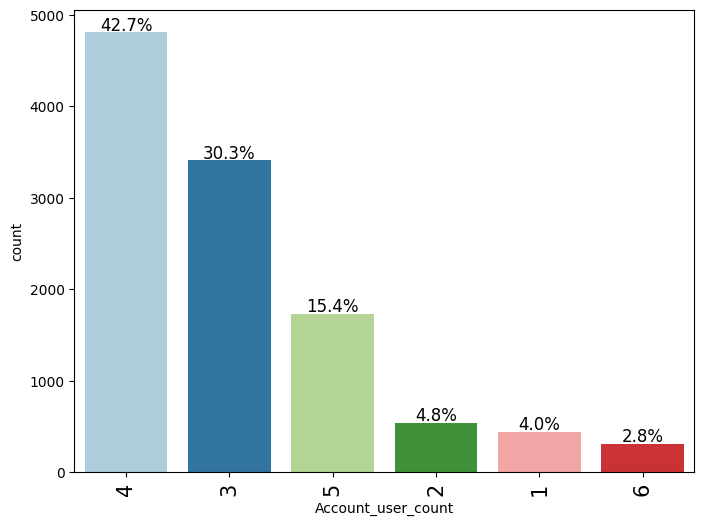

In [62]:
labeled_barplot(data,'Account_user_count',perc=True)

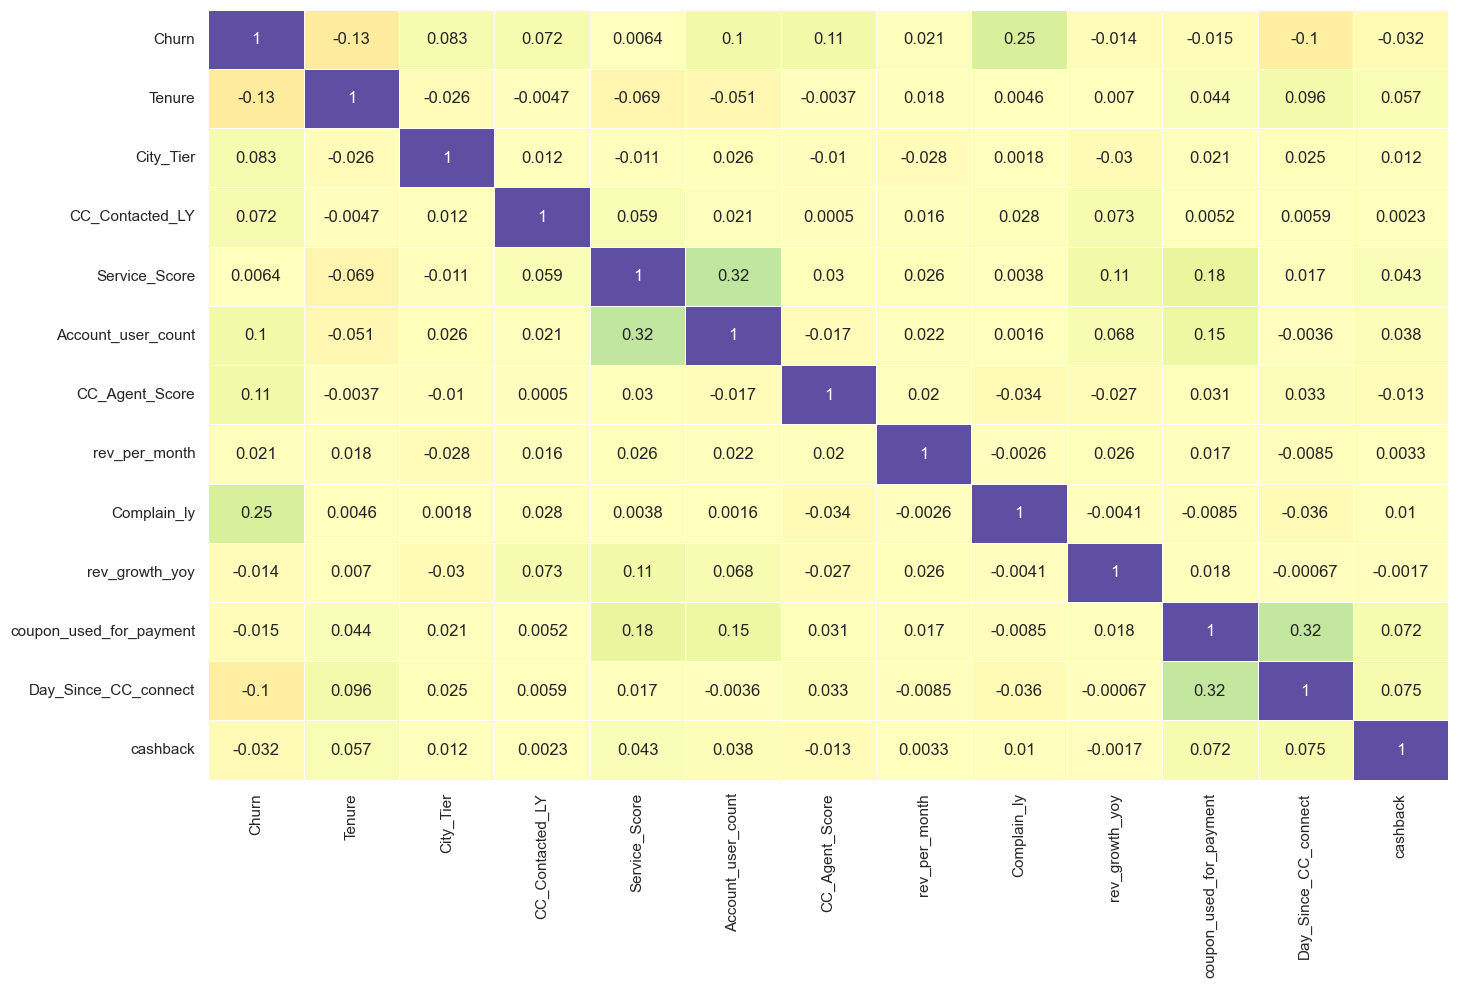

In [63]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(numeric_only=True),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

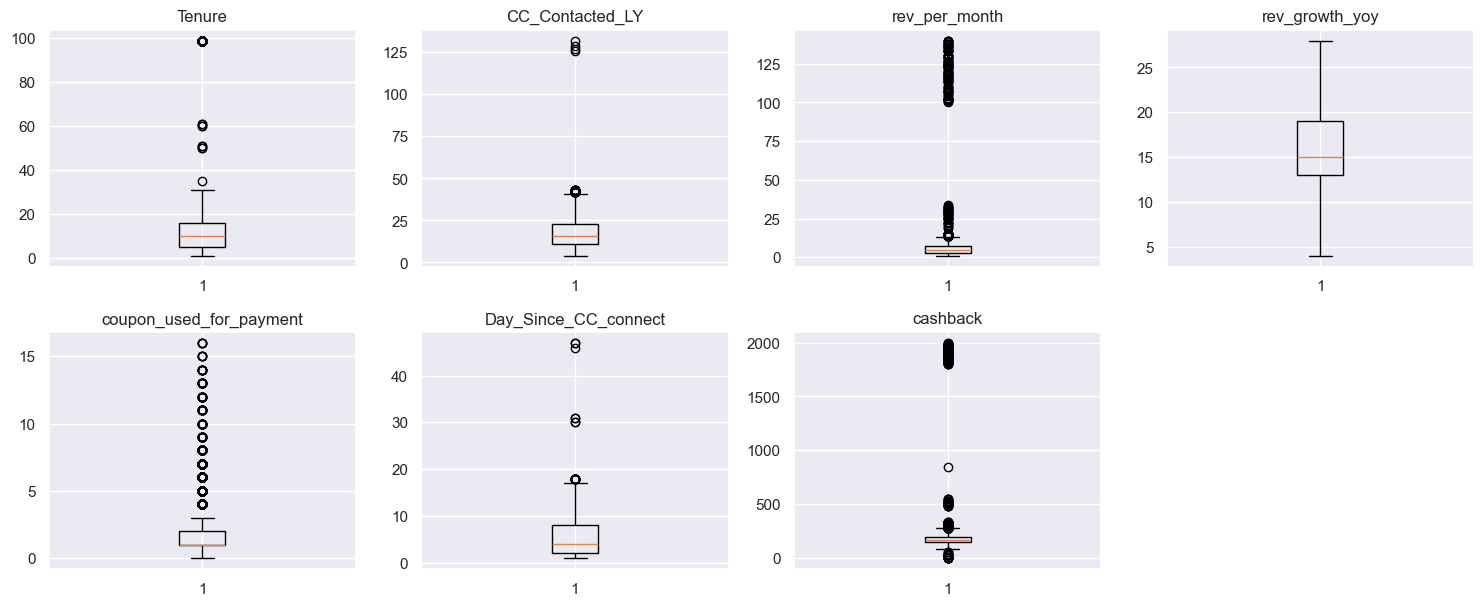

In [66]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(selected_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

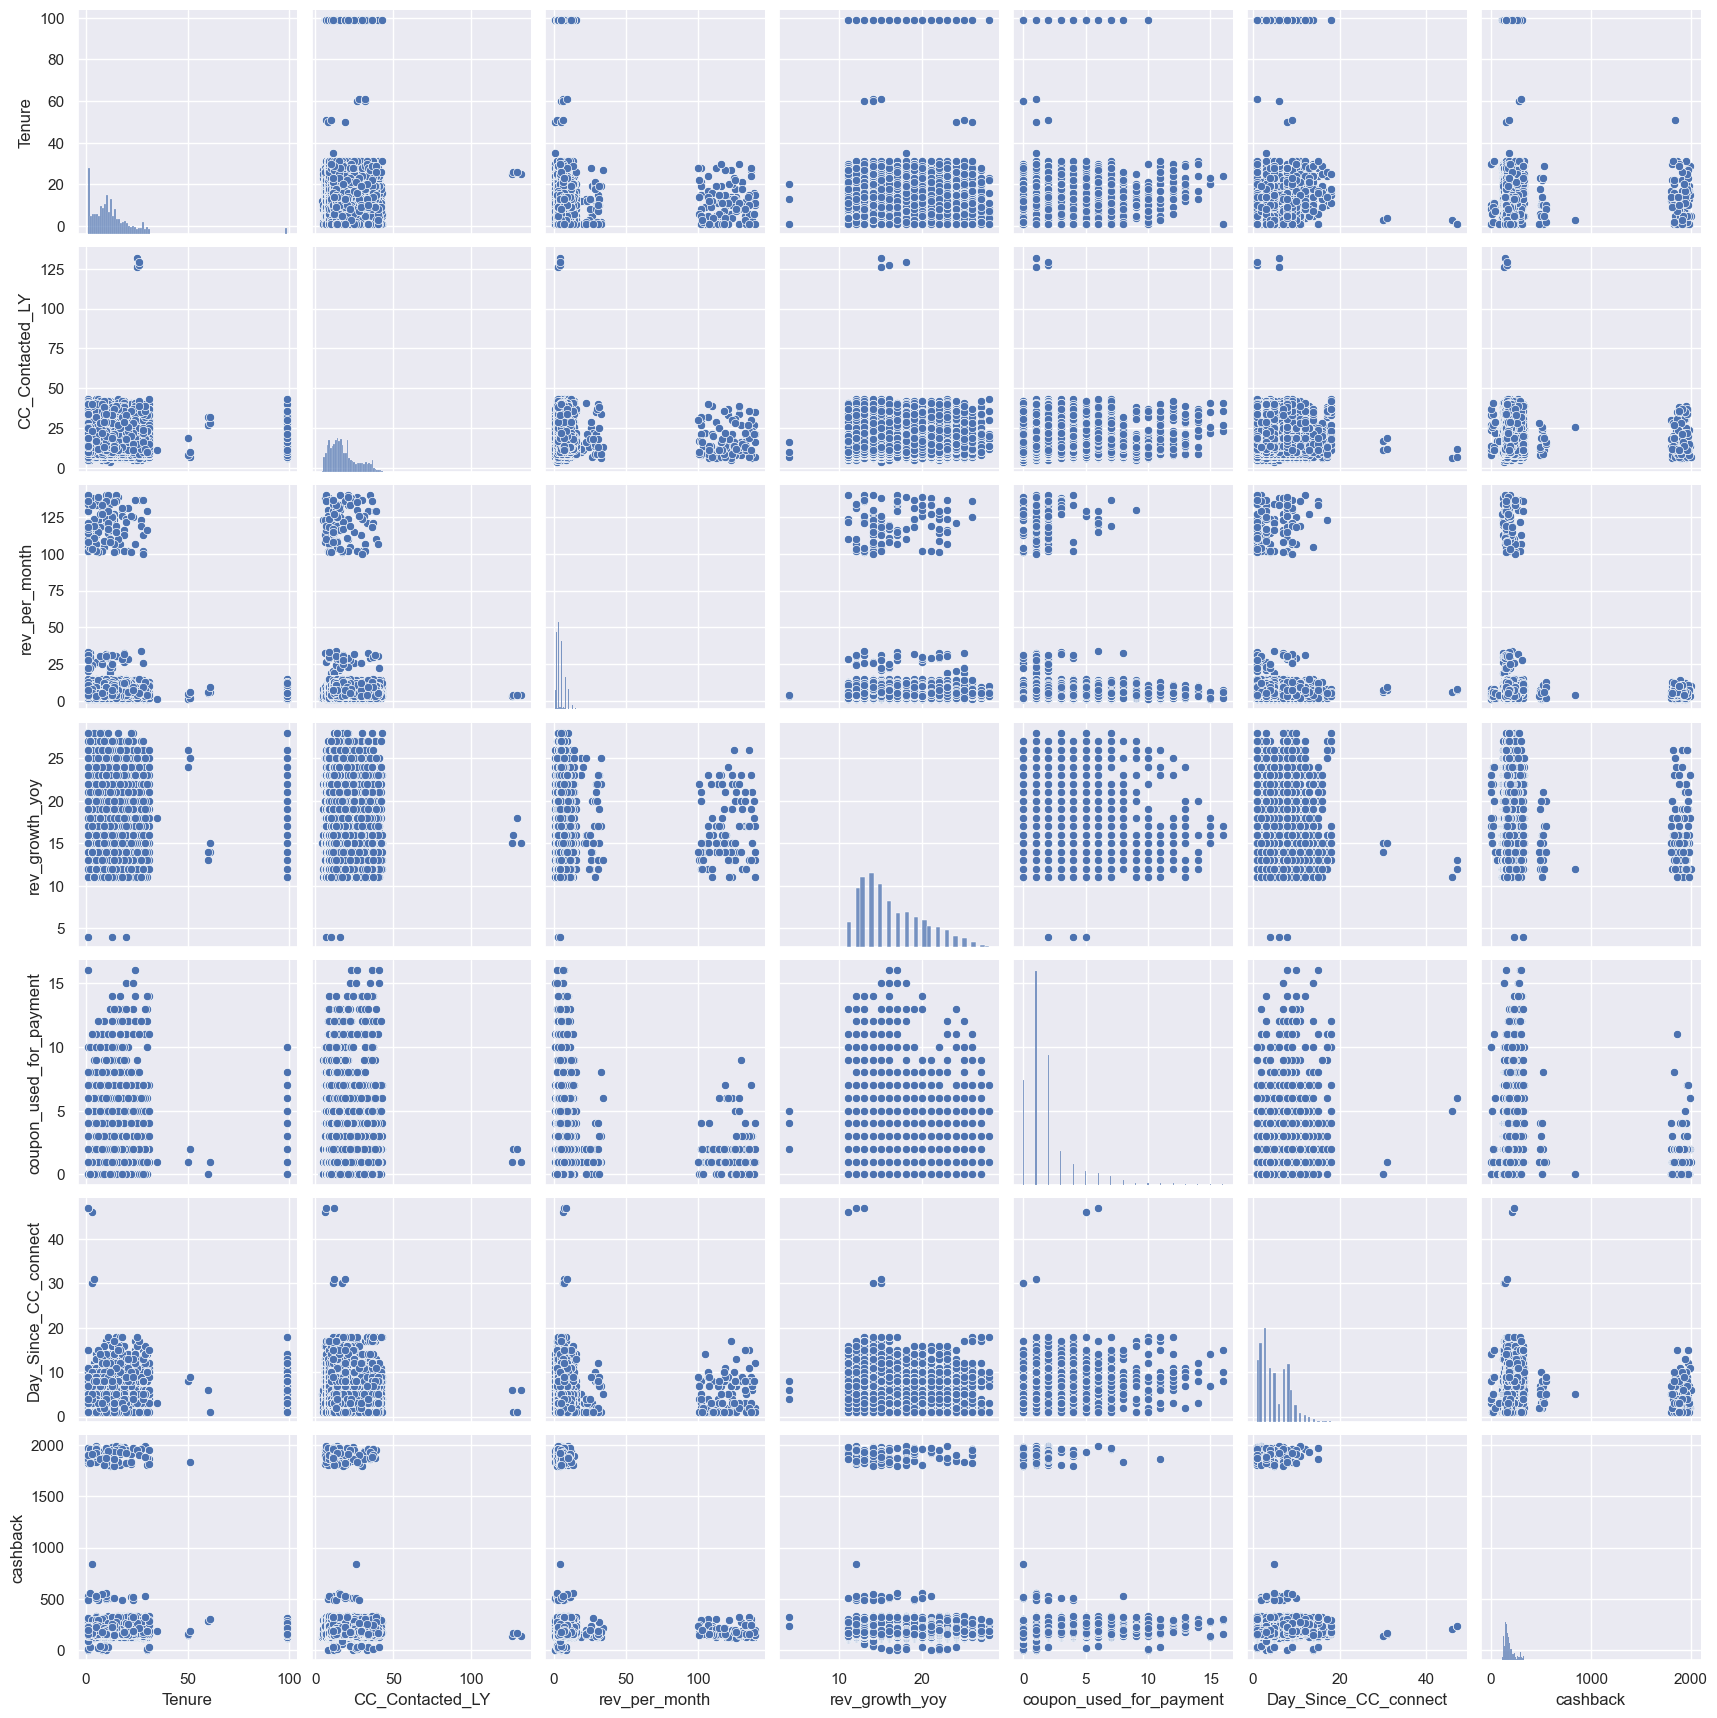

In [65]:
selected_columns = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 
                    'rev_growth_yoy', 'coupon_used_for_payment', 
                    'Day_Since_CC_connect', 'cashback']

sns.pairplot(data[selected_columns])  
plt.show()

Churn         0     1    All
City_Tier                   
All        9364  1896  11260
1          6246  1065   7311
3          2683   728   3411
2           435   103    538
------------------------------------------------------------------------------------------------------------------------


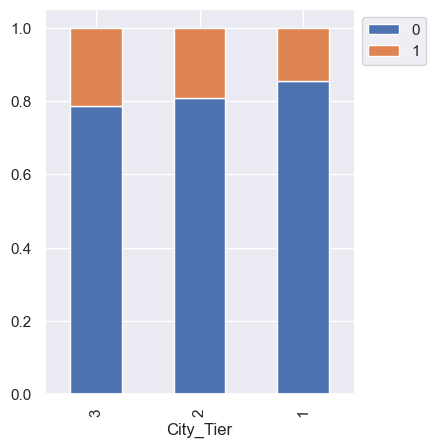

In [67]:
stacked_barplot(data, "City_Tier", "Churn")

Churn                0     1    All
Payment                            
All               9364  1896  11260
Debit Card        3972   724   4696
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822
------------------------------------------------------------------------------------------------------------------------


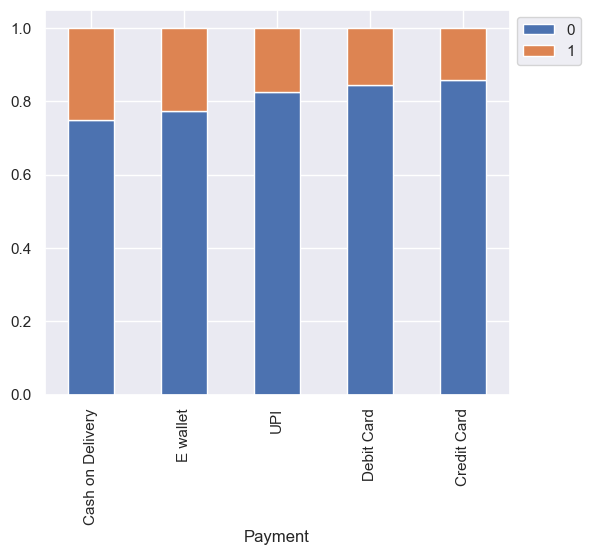

In [68]:
stacked_barplot(data, "Payment", "Churn")

Churn             0     1    All
Service_Score                   
All            9364  1896  11260
3              4621   949   5570
2              2713   553   3266
4              1940   394   2334
1                77     0     77
5                13     0     13
------------------------------------------------------------------------------------------------------------------------


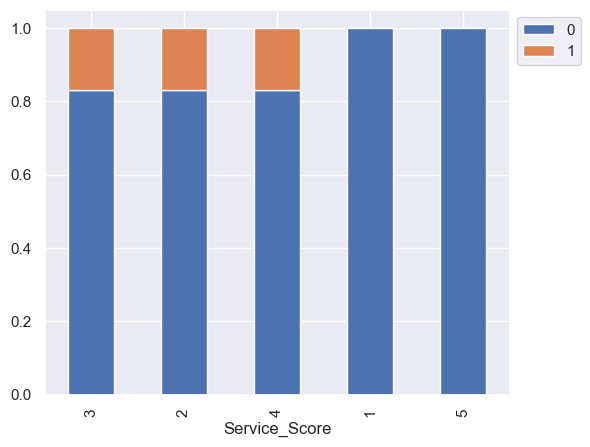

In [69]:
stacked_barplot(data, "Service_Score", "Churn")

Churn                  0     1    All
Account_user_count                   
All                 9364  1896  11260
4                   4021   789   4810
3                   2897   515   3412
5                   1346   390   1736
6                    206   109    315
2                    492    49    541
1                    402    44    446
------------------------------------------------------------------------------------------------------------------------


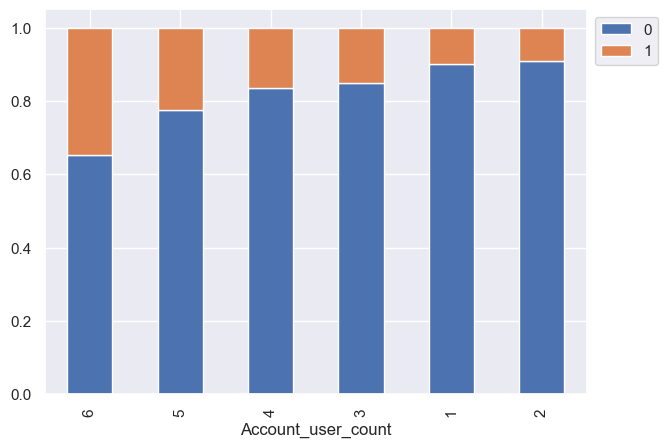

In [70]:
stacked_barplot(data, "Account_user_count", "Churn")

Churn               0     1    All
account_segment                   
All              9364  1896  11260
Regular Plus     3044  1137   4181
Super            3646   416   4062
HNI              1416   263   1679
Regular           480    40    520
Super Plus        778    40    818
------------------------------------------------------------------------------------------------------------------------


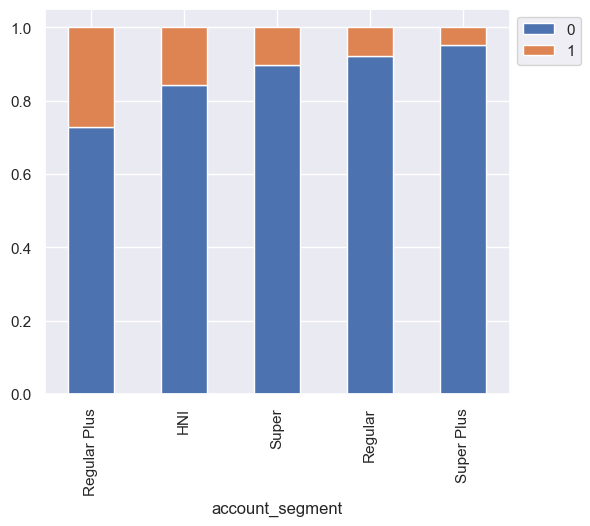

In [71]:
stacked_barplot(data, "account_segment", "Churn")

<Axes: xlabel='account_segment', ylabel='Tenure'>

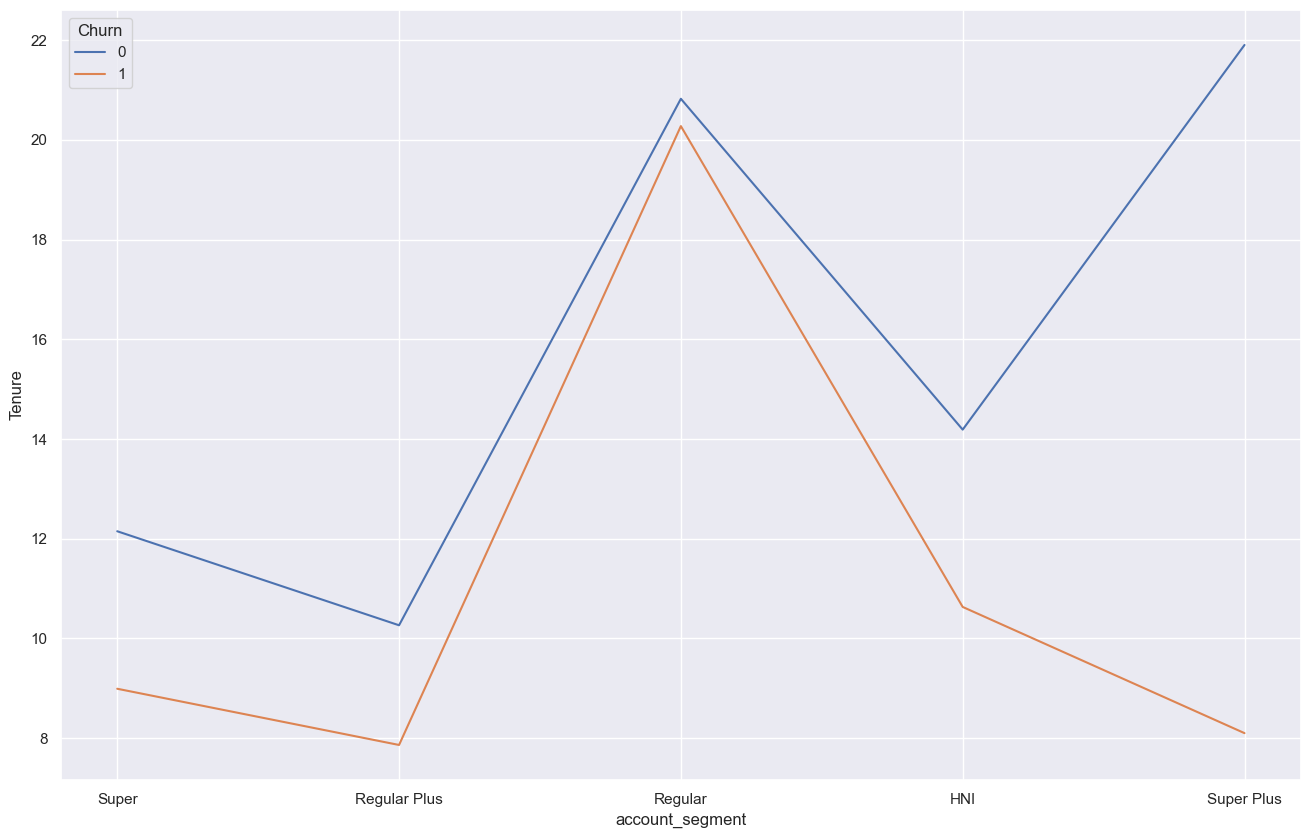

In [72]:
sns.lineplot(data=data,x='account_segment',y='Tenure',hue='Churn',errorbar=None)

<Axes: xlabel='account_segment', ylabel='Churn'>

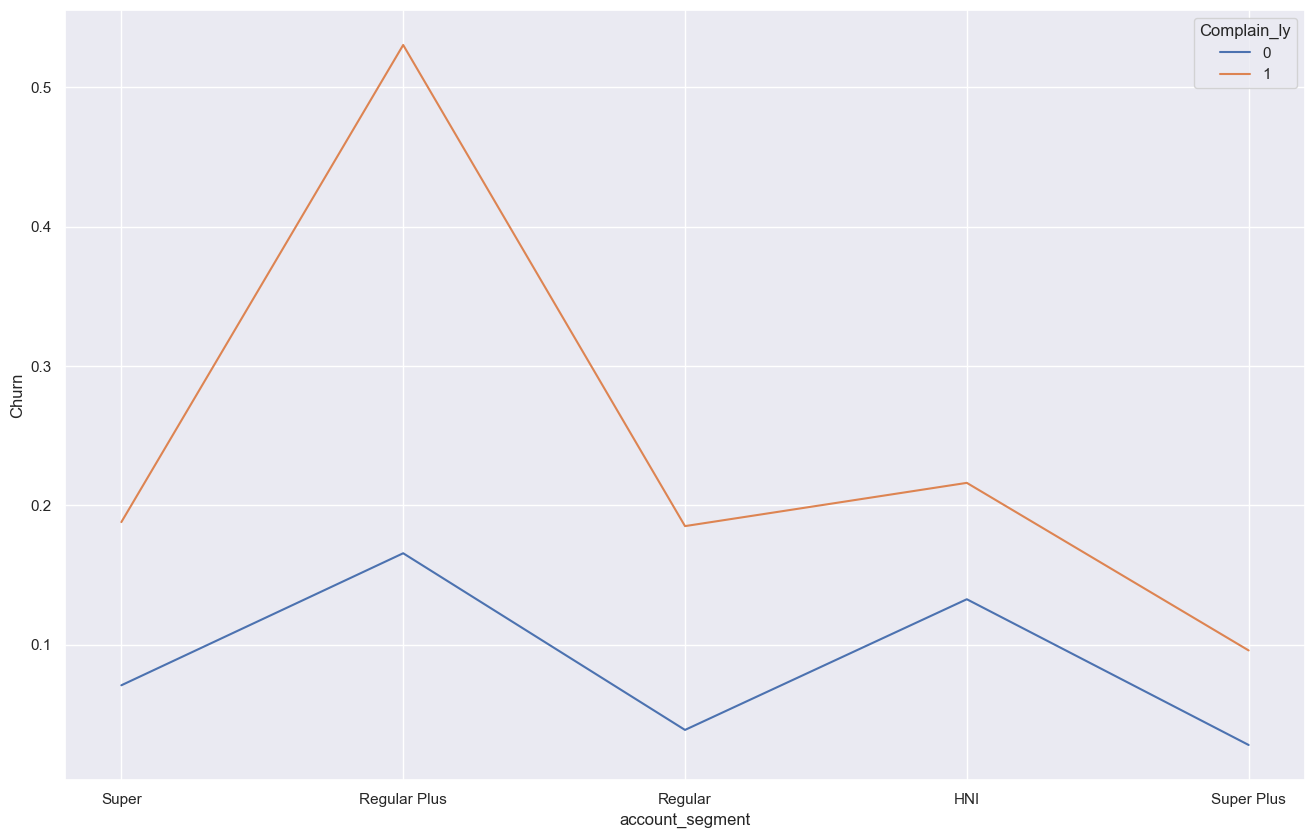

In [73]:
sns.lineplot(data=data,x='account_segment',y='Churn',hue='Complain_ly',errorbar=None)

Churn              0     1    All
CC_Agent_Score                   
All             9364  1896  11260
3               2831   591   3422
5               1672   524   2196
4               1787   369   2156
1               2039   264   2303
2               1035   148   1183
------------------------------------------------------------------------------------------------------------------------


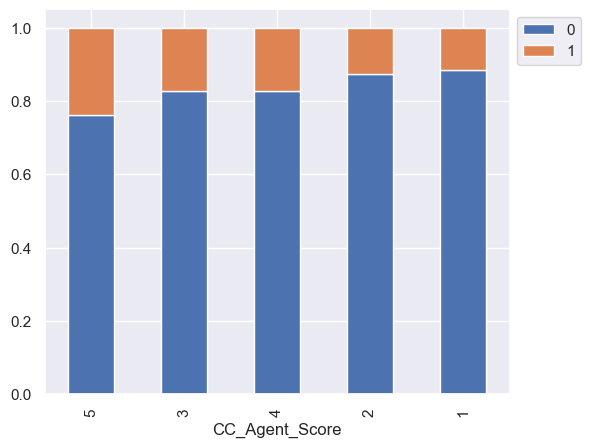

In [74]:
stacked_barplot(data, "CC_Agent_Score", "Churn")

Churn              0     1    All
Marital_Status                   
All             9364  1896  11260
Single          2573   947   3520
Married         5367   705   6072
Divorced        1424   244   1668
------------------------------------------------------------------------------------------------------------------------


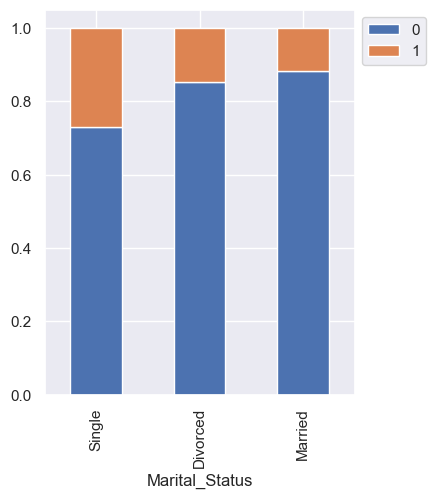

In [75]:
stacked_barplot(data, "Marital_Status", "Churn")

Churn           0     1    All
Complain_ly                   
All          9364  1896  11260
1            2170  1004   3174
0            7194   892   8086
------------------------------------------------------------------------------------------------------------------------


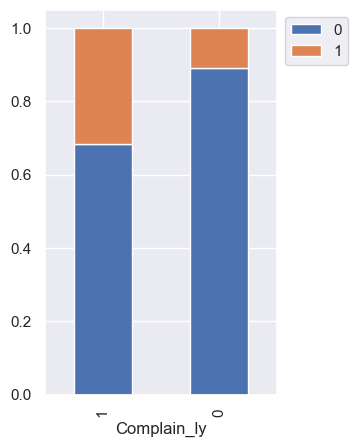

In [76]:
stacked_barplot(data, "Complain_ly", "Churn")

Churn                       0     1    All
coupon_used_for_payment                   
All                      9364  1896  11260
1                        3615   760   4375
2                        2210   446   2656
0                        1776   374   2150
3                         602    96    698
4                         363    62    425
5                         238    46    284
6                         198    36    234
7                         148    36    184
8                          68    20     88
10                         28     6     34
11                         26     4     30
9                          30     4     34
12                         24     2     26
15                          2     2      4
16                          2     2      4
13                         22     0     22
14                         12     0     12
------------------------------------------------------------------------------------------------------------------------


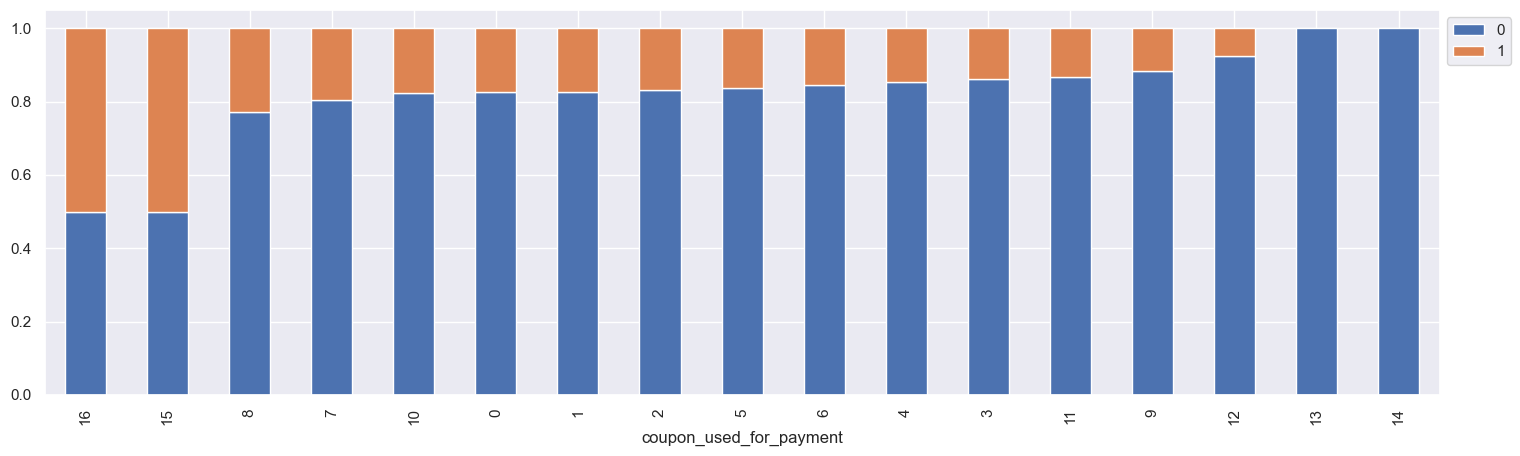

In [77]:
stacked_barplot(data, "coupon_used_for_payment", "Churn")

Churn            0     1    All
Login_device                   
All           9364  1896  11260
Mobile        6310  1172   7482
Computer      2421   597   3018
Unknown        633   127    760
------------------------------------------------------------------------------------------------------------------------


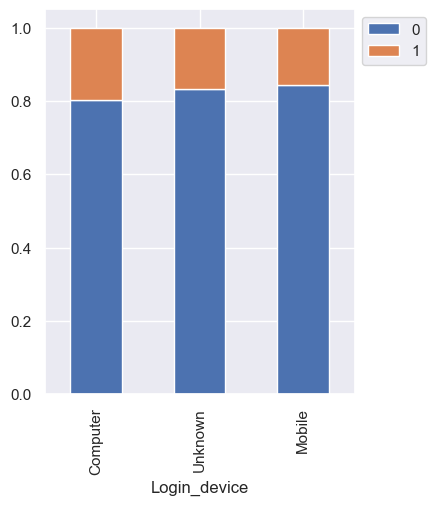

In [78]:
stacked_barplot(data, "Login_device", "Churn")

Churn                  0     1    All
Account_user_count                   
All                 9364  1896  11260
4                   4021   789   4810
3                   2897   515   3412
5                   1346   390   1736
6                    206   109    315
2                    492    49    541
1                    402    44    446
------------------------------------------------------------------------------------------------------------------------


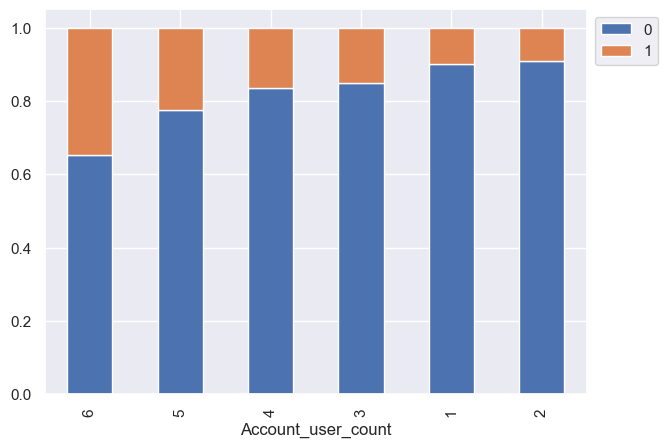

In [79]:
stacked_barplot(data, "Account_user_count", "Churn")

Insights from EDA and its impact on business:
* 72% of customers have not raised a complain in the last 12 months, which is a positive sign. However, 40% of customers who raised complaints have churned, highlighting a strong link between dissatisfaction and attrition. Ensuring with first-time resolution of complaints and implementing  proactive support strategies such as feedback surveys and personalized problem-solving.
* Most customers are from Tier 1 cities (65%), with only 5% from Tier 2. This suggests a high digital adoption rate and urban market concentration.Consider in expanding services in Tier 2 and Tier 3 cities through targeted marketing campaigns and localized promotions.
* Only 21% of customers have rated the service as 4 or 5 stars, indicating room for improvement in customer experience.Investing in service quality training could improve rating.
* Focus on early engagement strategies, such as personalized welcome offers and proactive customer support, to reduce churn in new customers.
* Most customers contact customer care fewer times, but a small group contacts excessively (outliers beyond 60 times).Priority handling for frequent complainants to improve efficiency.
* Customers with low tenure are less likely to churn and customer with high tenure more likely to churn.
* The Business has to be cautious about the account segment ‘Regular ‘and ‘Regular plus’.

Segmentation made from EDA:
Segment 1: Low Tenure,No complain raised and higher customer care score are less likely to churn.

Segment 2: High Tenure,complain raised and lower customer care score are more likely to churn.

Impact : These insights will certainly help the business stay competitive in the market by making it easier to identify potential churners. With this information, the business can proactively target and retain at-risk customers, improving customer retention and reducing churn.  
Identifying and retaining customers at risk of churning has a direct impact on revenue. It protects the business from revenue loss, as losing customers directly affects overall profitability.


In [80]:
df = data.copy()

In [81]:
X = df.drop(["Churn"], axis=1)
Y = df["Churn"]

In [82]:
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

In [83]:
X.head()

const  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0  1.000   4.000      3.000            6.000          3.000   
1  1.000  12.000      1.000            8.000          3.000   
2  1.000  28.000      1.000           30.000          2.000   
3  1.000  28.000      3.000           15.000          2.000   
4  1.000  28.000      1.000           12.000          2.000   

   Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
0               3.000           2.000          9.000        1.000   
1               4.000           3.000          7.000        1.000   
2               4.000           3.000          6.000        1.000   
3               4.000           5.000          8.000        0.000   
4               3.000           5.000          3.000        0.000   

   rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0          11.000                    1.000                 5.000   159.930   
1          15.000                    0.000                 5.000   120.900   
2          14.000                    0.000                 3.000   152.948   
3          23.000                    0.000                 3.000   134.070   
4          11.000                    1.000                 3.000   129.600   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                0.000               1.000             0.000        0.000   
1                0.000               0.000             0.000        1.000   
2                0.000               1.000             0.000        0.000   
3                0.000               1.000             0.000        0.000   
4                1.000               0.000             0.000        0.000   

   account_segment_Regular  account_segment_Regular Plus  \
0                    0.000                         0.000   
1                    0.000                         1.000   
2                    0.000                         1.000   
3                    0.000                         0.000   
4                    0.000                         1.000   

   account_segment_Super  account_segment_Super Plus  Marital_Status_Married  \
0                  1.000                       0.000                   0.000   
1                  0.000                       0.000                   0.000   
2                  0.000                       0.000                   0.000   
3                  1.000                       0.000                   0.000   
4                  0.000                       0.000                   0.000   

   Marital_Status_Single  Login_device_Mobile  Login_device_Unknown  
0                  1.000                1.000                 0.000  
1                  1.000                1.000                 0.000  
2                  1.000                1.000                 0.000  
3                  1.000                1.000                 0.000  
4                  1.000                1.000                 0.000

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)

In [85]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9008
Model:                          Logit   Df Residuals:                     8983
Method:                           MLE   Df Model:                           24
Date:                Tue, 06 May 2025   Pseudo R-squ.:                  0.2402
Time:                        11:25:15   Log-Likelihood:                -3111.4
converged:                       True   LL-Null:                       -4094.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.1202      0.313    -13.168      0.000      -4.734      -3.507
Tenure                          -0.0330      0.004     -7.808      0.000     

In [86]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [87]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

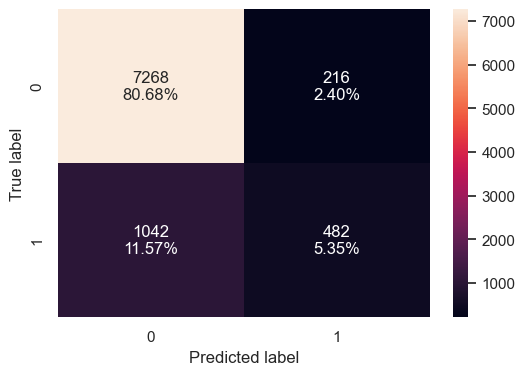

In [88]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [89]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision    F1
0     0.860   0.316      0.691 0.434

In [90]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                          84.852
Tenure                          1.097
City_Tier                       1.451
CC_Contacted_LY                 1.020
Service_Score                   1.165
Account_user_count              1.136
CC_Agent_Score                  1.013
rev_per_month                   1.007
Complain_ly                     1.005
rev_growth_yoy                  1.026
coupon_used_for_payment         1.201
Day_Since_CC_connect            1.240
cashback                        1.080
Payment_Credit Card             3.042
Payment_Debit Card              3.257
Payment_E wallet                2.299
Payment_UPI                     1.678
account_segment_Regular         1.311
account_segment_Regular Plus    2.577
account_segment_Super           2.273
account_segment_Super Plus      1.437
Marital_Status_Married          2.146
Marital_Status_Single           2.160
Login_device_Mobile             1.186
Login_device_Unknown            1.176
dtype: float64


In [91]:
odds = np.exp(lg.params)

# finding the percentage change
perc_change_odds = (np.exp(lg.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

const  Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
Odds          0.016   0.968      1.551            1.031          0.813   
Change_odd% -98.376  -3.244     55.063            3.117        -18.711   

             Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
Odds                      1.407           1.325          1.009        4.870   
Change_odd%              40.664          32.500          0.900      387.012   

             rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Odds                  0.978                    1.057                 0.980   
Change_odd%          -2.201                    5.701                -2.014   

             cashback  Payment_Credit Card  Payment_Debit Card  \
Odds            1.000                0.523               0.590   
Change_odd%     0.014              -47.730             -41.012   

             Payment_E wallet  Payment_UPI  account_segment_Regular  \
Odds                    0.918        0.627                    0.821   
Change_odd%            -8.204      -37.252                  -17.880   

             account_segment_Regular Plus  account_segment_Super  \
Odds                                2.803                  0.546   
Change_odd%                       180.347                -45.387   

             account_segment_Super Plus  Marital_Status_Married  \
Odds                              0.323                   0.724   
Change_odd%                     -67.714                 -27.589   

             Marital_Status_Single  Login_device_Mobile  Login_device_Unknown  
Odds                         2.167                0.673                 0.687  
Change_odd%                116.654              -32.673               -31.304

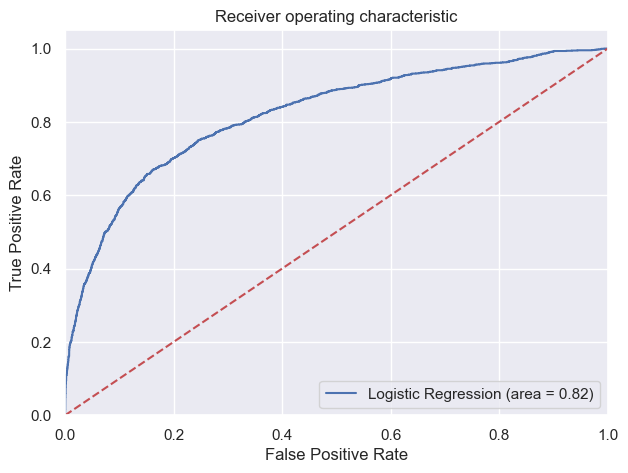

In [92]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [93]:
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.23735202828832397


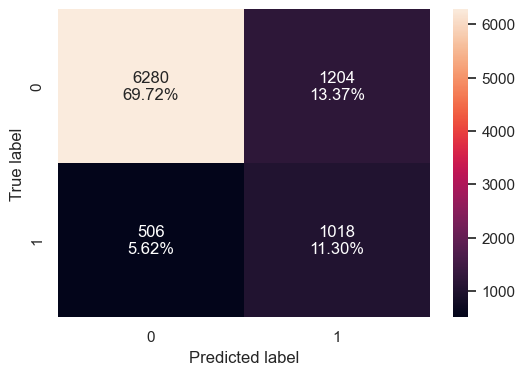

In [94]:
confusion_matrix_statsmodels(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [95]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision    F1
0     0.810   0.668      0.458 0.544

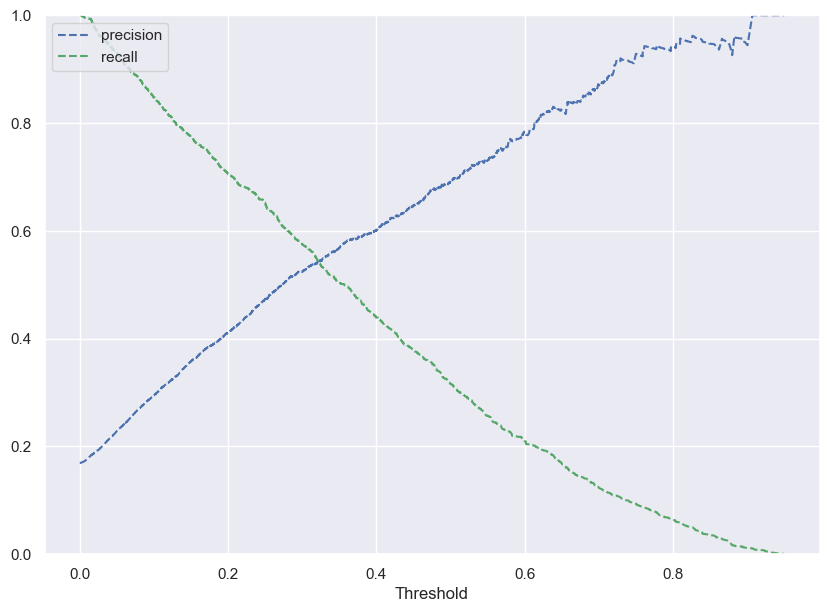

In [96]:
y_scores = lg.predict(X_train)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [97]:
optimal_threshold_curve = 0.3

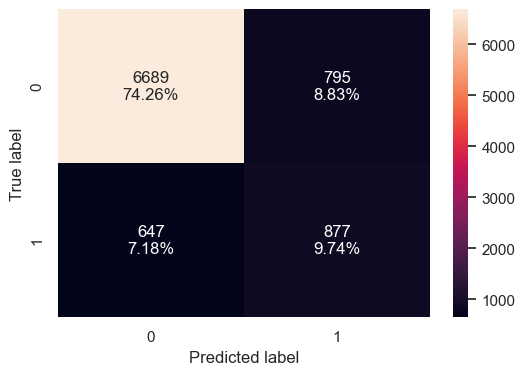

In [98]:
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=optimal_threshold_curve)

In [99]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision    F1
0     0.840   0.575      0.525 0.549

In [100]:
df1 = data.copy()

In [101]:
X1 = df1.drop(["Churn"], axis=1)
Y1 = df1["Churn"]

In [102]:
X1 = pd.get_dummies(X1, drop_first=True)

#Converting values to float
X1 = X1.astype(float)

In [103]:
X1.head()

Tenure  City_Tier  CC_Contacted_LY  Service_Score  Account_user_count  \
0   4.000      3.000            6.000          3.000               3.000   
1  12.000      1.000            8.000          3.000               4.000   
2  28.000      1.000           30.000          2.000               4.000   
3  28.000      3.000           15.000          2.000               4.000   
4  28.000      1.000           12.000          2.000               3.000   

   CC_Agent_Score  rev_per_month  Complain_ly  rev_growth_yoy  \
0           2.000          9.000        1.000          11.000   
1           3.000          7.000        1.000          15.000   
2           3.000          6.000        1.000          14.000   
3           5.000          8.000        0.000          23.000   
4           5.000          3.000        0.000          11.000   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0                    1.000                 5.000   159.930   
1                    0.000                 5.000   120.900   
2                    0.000                 3.000   152.948   
3                    0.000                 3.000   134.070   
4                    1.000                 3.000   129.600   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                0.000               1.000             0.000        0.000   
1                0.000               0.000             0.000        1.000   
2                0.000               1.000             0.000        0.000   
3                0.000               1.000             0.000        0.000   
4                1.000               0.000             0.000        0.000   

   account_segment_Regular  account_segment_Regular Plus  \
0                    0.000                         0.000   
1                    0.000                         1.000   
2                    0.000                         1.000   
3                    0.000                         0.000   
4                    0.000                         1.000   

   account_segment_Super  account_segment_Super Plus  Marital_Status_Married  \
0                  1.000                       0.000                   0.000   
1                  0.000                       0.000                   0.000   
2                  0.000                       0.000                   0.000   
3                  1.000                       0.000                   0.000   
4                  0.000                       0.000                   0.000   

   Marital_Status_Single  Login_device_Mobile  Login_device_Unknown  
0                  1.000                1.000                 0.000  
1                  1.000                1.000                 0.000  
2                  1.000                1.000                 0.000  
3                  1.000                1.000                 0.000  
4                  1.000                1.000                 0.000

In [104]:
num_columns = ['Tenure', 'City_Tier','CC_Contacted_LY','Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','Day_Since_CC_connect','cashback']

In [105]:
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X1[num_columns])

# Transform selected columns in X using the fitted scaler

X1[num_columns] = scaler.transform(X1[num_columns])

In [106]:
X1.head()

Tenure  City_Tier  CC_Contacted_LY  Service_Score  Account_user_count  \
0  -0.680      1.476           -1.346          0.130              -0.684   
1  -0.030     -0.716           -1.119          0.130               0.304   
2   1.270     -0.716            1.376         -1.256               0.304   
3   1.270      1.476           -0.325         -1.256               0.304   
4   1.270     -0.716           -0.665         -1.256              -0.684   

   CC_Agent_Score  rev_per_month  Complain_ly  rev_growth_yoy  \
0          -0.776          0.230        1.000          11.000   
1          -0.049          0.057        1.000          15.000   
2          -0.049         -0.029        1.000          14.000   
3           1.406          0.144        0.000          23.000   
4           1.406         -0.289        0.000          11.000   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0                    1.000                -0.024    -0.207   
1                    0.000                -0.024    -0.429   
2                    0.000                -0.613    -0.246   
3                    0.000                -0.613    -0.354   
4                    1.000                -0.613    -0.379   

   Payment_Credit Card  Payment_Debit Card  Payment_E wallet  Payment_UPI  \
0                0.000               1.000             0.000        0.000   
1                0.000               0.000             0.000        1.000   
2                0.000               1.000             0.000        0.000   
3                0.000               1.000             0.000        0.000   
4                1.000               0.000             0.000        0.000   

   account_segment_Regular  account_segment_Regular Plus  \
0                    0.000                         0.000   
1                    0.000                         1.000   
2                    0.000                         1.000   
3                    0.000                         0.000   
4                    0.000                         1.000   

   account_segment_Super  account_segment_Super Plus  Marital_Status_Married  \
0                  1.000                       0.000                   0.000   
1                  0.000                       0.000                   0.000   
2                  0.000                       0.000                   0.000   
3                  1.000                       0.000                   0.000   
4                  0.000                       0.000                   0.000   

   Marital_Status_Single  Login_device_Mobile  Login_device_Unknown  
0                  1.000                1.000                 0.000  
1                  1.000                1.000                 0.000  
2                  1.000                1.000                 0.000  
3                  1.000                1.000                 0.000  
4                  1.000                1.000                 0.000

In [107]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.20, random_state=1)

In [108]:
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [110]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

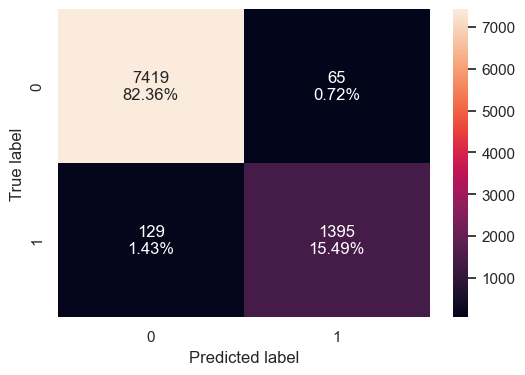

In [111]:
confusion_matrix_sklearn(knn_3, X1_train, y1_train)

In [112]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X1_train, y1_train
)
knn_perf_train_3

Accuracy  Recall  Precision    F1
0     0.978   0.915      0.955 0.935

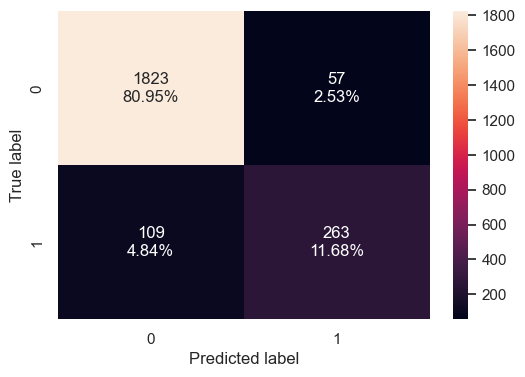

In [113]:
confusion_matrix_sklearn(knn_3, X1_test, y1_test)

In [114]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X1_test, y1_test
)
knn_perf_test_3

Accuracy  Recall  Precision    F1
0     0.926   0.707      0.822 0.760

In [115]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)

    # predict on train and test
    y_pred_train = knn.predict(X1_train)
    y_pred_test = knn.predict(X1_test)

    # evaluate recall on train and test
    scores_train = recall_score(y1_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y1_test, y_pred_test)
    recall_scores_test.append(scores_test)

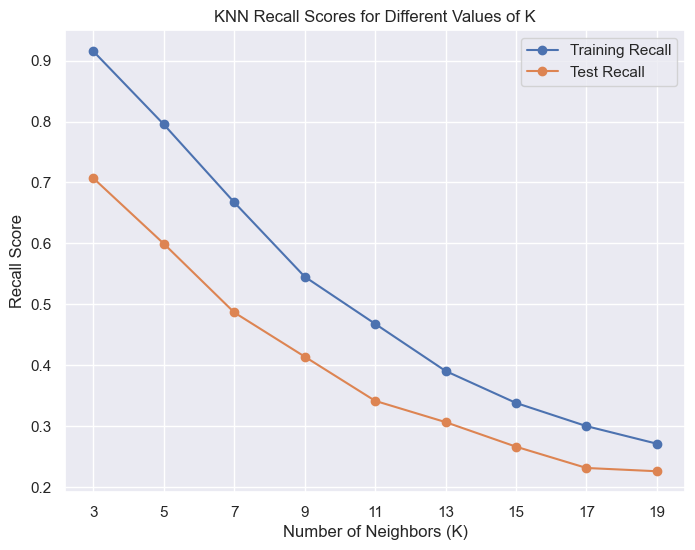

In [116]:
# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [117]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
f1_scores_train = []
f1_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X1_train, y1_train)

    # predict on train and test
    y_pred_train = knn.predict(X1_train)
    y_pred_test = knn.predict(X1_test)

    # evaluate recall on train and test
    scores_train = f1_score(y1_train, y_pred_train)
    f1_scores_train.append(scores_train)
    scores_test = f1_score(y1_test, y_pred_test)
    f1_scores_test.append(scores_test)

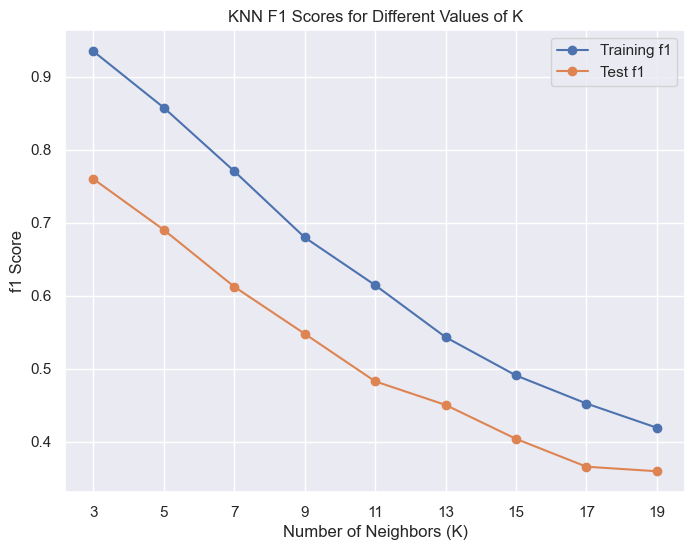

In [118]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, f1_scores_train, label='Training f1', marker='o')
plt.plot(neighbors, f1_scores_test, label='Test f1', marker='o')
plt.title('KNN F1 Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('f1 Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [119]:
df2 = data.copy()
X2 = df2.drop(["Churn"], axis=1)
Y2 = df2["Churn"]
X2 = pd.get_dummies(X2, drop_first=True)

#Converting values to float
X2 = X2.astype(float)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.20, random_state=1)

In [120]:
from sklearn.naive_bayes import ComplementNB

# Initialize Complement Naive Bayes
nb = ComplementNB()

In [121]:
nb.fit(X2_train, y2_train)

ComplementNB()

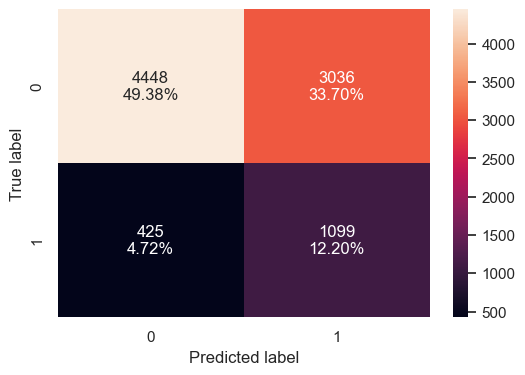

In [122]:
confusion_matrix_sklearn(nb, X2_train, y2_train)

In [123]:
nb_perf_train = model_performance_classification_sklearn(
    nb, X2_train, y2_train
)
nb_perf_train

Accuracy  Recall  Precision    F1
0     0.616   0.721      0.266 0.388

In [124]:
from sklearn.naive_bayes import MultinomialNB
nb1 = MultinomialNB()

In [125]:
nb1.fit(X2_train, y2_train)

MultinomialNB()

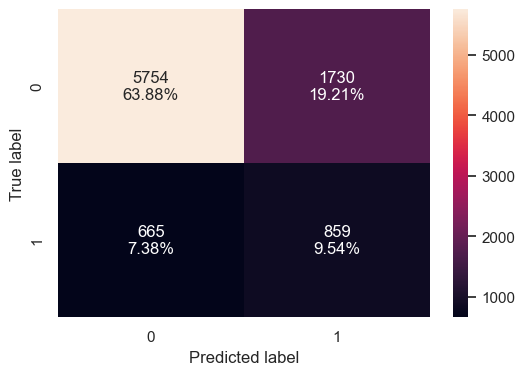

In [126]:
confusion_matrix_sklearn(nb1, X2_train, y2_train)

In [127]:
nb1_perf_train = model_performance_classification_sklearn(
    nb1, X2_train, y2_train
)
nb1_perf_train

Accuracy  Recall  Precision    F1
0     0.734   0.564      0.332 0.418

In [128]:
df3 = data.copy()

In [129]:
X = df3.drop(["Churn"], axis=1)
Y = df3["Churn"]

X = pd.get_dummies(X, drop_first=True)

#Converting values to float
X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)

In [130]:
model10 = DecisionTreeClassifier(random_state=1)
model10.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [131]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [132]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

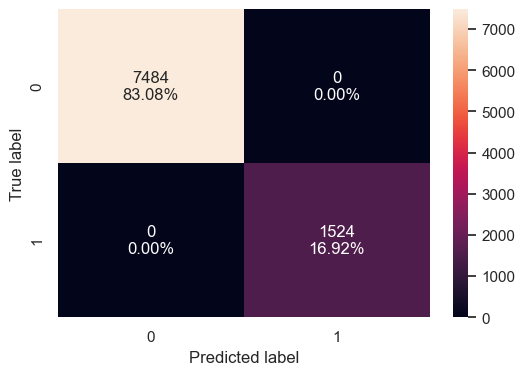

In [133]:
confusion_matrix_sklearn(model10, X_train, y_train)

In [134]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model10, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

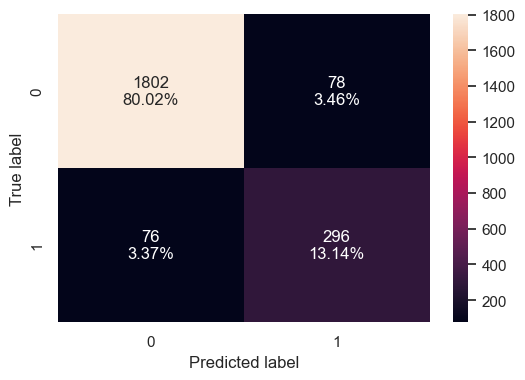

In [135]:
confusion_matrix_sklearn(model10, X_test, y_test)

In [136]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model10, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision    F1
0     0.932   0.796      0.791 0.794

In [137]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

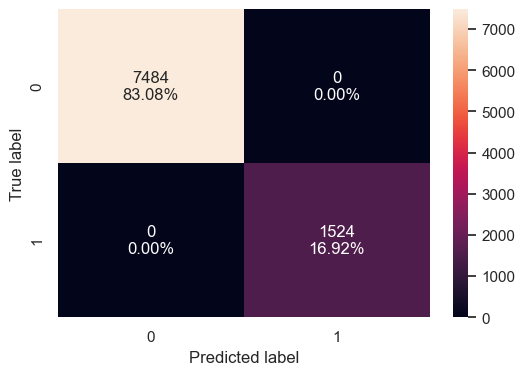

In [138]:
confusion_matrix_sklearn(model, X_train, y_train)

In [139]:
print("Training performance:")
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

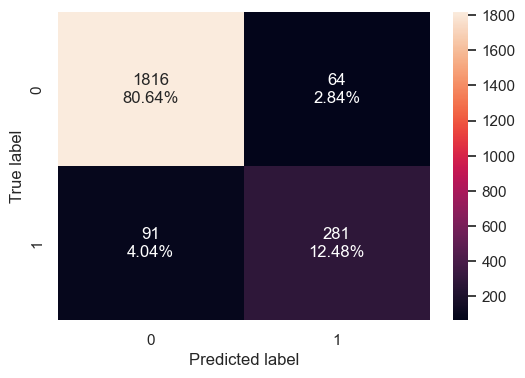

In [140]:
confusion_matrix_sklearn(model, X_test, y_test)

In [141]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
print("Test performance:")
decision_tree_perf_test

Test performance:


Accuracy  Recall  Precision    F1
0     0.931   0.755      0.814 0.784

In [142]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
f1_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=f1_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(6),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

In [143]:
decision_tree_tune_perf_f1train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
print("Training performance:")
decision_tree_tune_perf_f1train

Training performance:


Accuracy  Recall  Precision    F1
0     0.798   0.795      0.445 0.571

In [144]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [145]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05954778334855226


In [146]:
f1_train = []
for clf in clfs:
    pred_train_f1 = clf.predict(X_train)
    values_train_f1 = f1_score(y_train, pred_train_f1)
    f1_train.append(values_train_f1)

In [147]:
f1_test = []
for clf in clfs:
    pred_test_f1 = clf.predict(X_test)
    values_test_f1 = f1_score(y_test, pred_test_f1)
    f1_test.append(pred_test_f1)

In [148]:
train_scores_f1 = [clf.score(X_train, y_train) for clf in clfs]
test_scores_f1 = [clf.score(X_test, y_test) for clf in clfs]

In [149]:
index_best_model_f1 = np.argmax(f1_test)
best_model_f1 = clfs[index_best_model_f1]
print(best_model_f1)

DecisionTreeClassifier(ccp_alpha=np.float64(4.450386255845854e-20),
                       class_weight='balanced', random_state=1)


In [150]:
decision_tree_post_train_f1 = model_performance_classification_sklearn(
    best_model_f1, X_train, y_train
)
print("Training performance:")
decision_tree_post_train_f1

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [151]:
decision_tree_post_test_f1 = model_performance_classification_sklearn(
    best_model_f1, X_test, y_test
)
print("Test performance:")
decision_tree_post_test_f1

Test performance:


Accuracy  Recall  Precision    F1
0     0.931   0.755      0.814 0.784

In [152]:
param_grid = {'ccp_alpha': ccp_alphas}  # Use the computed ccp_alphas from pruning path

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=1, class_weight="balanced"),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Or use 'accuracy', 'precision', etc.
)

grid_search.fit(X_train, y_train)

# Best alpha value
print("Best ccp_alpha:", grid_search.best_params_['ccp_alpha'])

Best ccp_alpha: 0.00011993811526757064


In [153]:
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

final_clf = DecisionTreeClassifier(
    random_state=1, 
    ccp_alpha=best_ccp_alpha, 
    class_weight="balanced"
)

final_clf.fit(X_train, y_train)

# Evaluate on test data
y_pred = final_clf.predict(X_test)

# Performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1880
           1       0.77      0.78      0.77       372

    accuracy                           0.92      2252
   macro avg       0.86      0.87      0.86      2252
weighted avg       0.93      0.92      0.93      2252



In [154]:
best_ccp_alpha = 0.00011993811526757064  # Replace with your actual best value

best_model_ccp = DecisionTreeClassifier(
    random_state=1, 
    ccp_alpha=best_ccp_alpha, 
    class_weight="balanced"
)
best_model_ccp.fit(X_train, y_train)

# Evaluate the model performance
decision_tree_post_train_f1_ccp = model_performance_classification_sklearn(
    best_model_ccp, X_train, y_train
)

decision_tree_post_train_f1_ccp

Accuracy  Recall  Precision    F1
0     0.993   1.000      0.958 0.979

In [155]:
best_ccp_alpha = 0.00011993811526757064  # Replace with your actual best value

best_model_ccp = DecisionTreeClassifier(
    random_state=1, 
    ccp_alpha=best_ccp_alpha, 
    class_weight="balanced"
)
best_model_ccp.fit(X_train, y_train)

# Evaluate the model performance
decision_tree_post_test_f1_ccp = model_performance_classification_sklearn(
    best_model_ccp, X_test, y_test
)

decision_tree_post_test_f1_ccp

Accuracy  Recall  Precision    F1
0     0.925   0.777      0.771 0.774

In [156]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

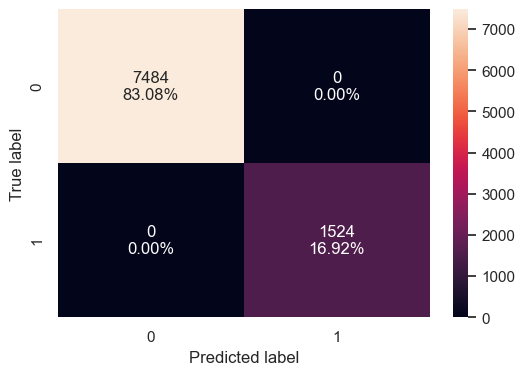

In [157]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [158]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
rf_model_train_perf

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [159]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
rf_model_test_perf

Accuracy  Recall  Precision    F1
0     0.953   0.734      0.978 0.839

In [160]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [161]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance:")
rf_wt_model_train_perf

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [162]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Test performance:")
rf_wt_model_test_perf

Test performance:


Accuracy  Recall  Precision    F1
0     0.956   0.742      0.993 0.849

In [163]:
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
        "max_depth": [None, 10, 20, 30, 50],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.7, min_samples_leaf=np.int64(1),
                       n_estimators=501, random_state=1)

In [164]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
rf_estimator_model_train_perf

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [165]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

Accuracy  Recall  Precision    F1
0     0.957   0.774      0.960 0.857

In [166]:
rf_estimator_1 = RandomForestClassifier(random_state=1)

# Define the parameter grid
param_distributions = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, 'log2', 'auto'],
    "max_samples": [0.7, 0.9, None],
    "max_depth": [None, 10, 20, 30, 50],  
    "min_samples_split": [2, 5, 10],  
    "bootstrap": [True, False],  
    "class_weight": [None, "balanced", "balanced_subsample"],  
    "criterion": ["gini", "entropy", "log_loss"],  
    "max_leaf_nodes": [None, 10, 20, 50, 100],  
}

# Run the randomized search
randomized_search = RandomizedSearchCV(
    rf_estimator_1, 
    param_distributions, 
    scoring='recall',  
    n_iter=100,  # Reduce search space to 50 iterations
    cv=5,  
    random_state=1,  
    n_jobs=-1  # Use all CPU cores for faster computation
)

# Fit the model
randomized_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = randomized_search.best_params_
rf_best = randomized_search.best_estimator_

# Print best parameters
print("Best parameters:", best_params)
print("Best Recall Score:", randomized_search.best_score_)

# Fit the best estimator to training data
rf_best.fit(X_train, y_train)


Best parameters: {'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': np.int64(3), 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 0.7, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': 'balanced_subsample', 'bootstrap': False}
Best Recall Score: 0.8287359792924935


RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='log_loss', max_features=0.7,
                       min_samples_leaf=np.int64(3), min_samples_split=5,
                       n_estimators=110, random_state=1)

In [167]:
tuned_rf_1 = RandomForestClassifier(
    n_estimators=110,
    min_samples_split=10,
    min_samples_leaf=5,
    max_leaf_nodes=50,
    max_features=0.9,
    max_depth=12,
    criterion='gini',
    class_weight='balanced',
)
tuned_rf_1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=0.9,
                       max_leaf_nodes=50, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=110)

In [168]:
Tuned_rf_1 = model_performance_classification_sklearn(tuned_rf_1, X_train, y_train)
Tuned_rf_1

Accuracy  Recall  Precision    F1
0     0.871   0.837      0.583 0.688

In [169]:
rf_estimator_new = RandomForestClassifier(random_state=1)

# Parameter grid
parameters = {
    "n_estimators": [110, 251, 501],
    "min_samples_leaf": np.arange(1, 6, 1),
    "max_features": [0.7, 0.9, 'log2', 'auto'],
    "max_samples": [0.7, 0.9, None],
    "max_depth": [None, 10, 20, 30, 50],
}

# Run RandomizedSearchCV (n_iter controls the number of random samples tested)
random_search = RandomizedSearchCV(
    rf_estimator_new, 
    parameters, 
    scoring='recall', 
    cv=5, 
    n_iter=50,  # Number of random samples to test
    random_state=1, 
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
rf_estimator_new = random_search.best_estimator_

# Fit the best model to the data
rf_estimator_new.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=0.9,
                       min_samples_leaf=np.int64(1), n_estimators=251,
                       random_state=1)

In [170]:
tuned_rf_new = RandomForestClassifier(
    n_estimators=250,
    max_features=0.8,
    max_depth=50,
    class_weight='balanced',
    min_samples_split=5,
    random_state=1,
    min_samples_leaf=2,
)
tuned_rf_new.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50, max_features=0.8,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=250, random_state=1)

In [171]:
Tuned_rf_new = model_performance_classification_sklearn(tuned_rf_new, X_train, y_train)
print("Training performance:")
Tuned_rf_new

Training performance:


Accuracy  Recall  Precision    F1
0     0.998   1.000      0.988 0.994

In [172]:
Tuned_rf_new = model_performance_classification_sklearn(tuned_rf_new, X_test, y_test)
print("Test performance:")
Tuned_rf_new

Test performance:


Accuracy  Recall  Precision    F1
0     0.956   0.793      0.928 0.855

In [173]:
gb_estimator=GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [174]:
gb_estimator_model_train_perf = model_performance_classification_sklearn(gb_estimator, X_train,y_train)
gb_estimator_model_train_perf

Accuracy  Recall  Precision    F1
0     0.903   0.520      0.848 0.644

In [175]:
gb_estimator_model_test_perf = model_performance_classification_sklearn(gb_estimator, X_test, y_test)
gb_estimator_model_test_perf

Accuracy  Recall  Precision    F1
0     0.896   0.489      0.805 0.609

In [176]:
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations

recall_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=recall_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, max_features=0.7,
                           n_estimators=np.int64(175), random_state=1,
                           subsample=1)

In [177]:
gb_tuned_model_train_perf = model_performance_classification_sklearn(gb_tuned, X_train,y_train)
gb_tuned_model_train_perf

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [178]:
gb_tuned_model_test_perf = model_performance_classification_sklearn(gb_tuned, X_test, y_test)
gb_tuned_model_test_perf

Accuracy  Recall  Precision    F1
0     0.967   0.831      0.966 0.893

In [179]:
Model1 = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [75, 100, 125, 150],
    'subsample': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 1, 3, 5],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1],
    'learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
    'max_depth': [3, 5, 7, 10],  # Added to control tree depth
    'min_child_weight': [1, 3, 5, 7],  # Controls leaf size
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.01, 0.1, 1],  # L2 regularization
    'scale_pos_weight': [1, 2, 5, 10]  # Helps with imbalanced data
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model1, 
    param_distributions=param_grid, 
    n_iter=100, 
    scoring=scorer, 
    cv=10, 
    random_state=1, 
    n_jobs=-1
)

# Fit the model
randomized_cv.fit(X_train, y_train)

# Print the best parameters
print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:26:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:26:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:26:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:26:42] WARNING: /Users/

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8} with CV score=0.8929609103238028


In [180]:
tuned_xgb_1 = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=5,
    reg_lambda=1.2,
    reg_alpha=0.1,
    min_child_weight=5,
    random_state=1,
    n_estimators=200,
    gamma=0,
    colsample_bytree=0.8,
    colsample_bylevel=0.8,
    learning_rate= 0.2,
    max_depth=10,
)
tuned_xgb_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [181]:
tuned_xgb_train_new = model_performance_classification_sklearn(tuned_xgb_1, X_train, y_train)
tuned_xgb_train_new

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [182]:
tuned_xgb_test_new = model_performance_classification_sklearn(tuned_xgb_1, X_test, y_test)
tuned_xgb_test_new

Accuracy  Recall  Precision    F1
0     0.974   0.901      0.941 0.920

In [183]:
Model_1 = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [75, 100, 125, 150],
    'subsample': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 1, 3, 5],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1],
    'learning_rate': [0.1, 0.01, 0.2, 0.05, 1],
    'max_depth': [3, 5, 7, 10],  # Controls tree depth
    'min_child_weight': [1, 3, 5, 7],  # Controls leaf size
    'reg_alpha': [0, 0.01, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.01, 0.1, 1],  # L2 regularization
    'scale_pos_weight': [1, 2, 5, 10]  # Helps with imbalanced data
}

# Define Stratified K-Fold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the RandomizedSearchCV with Stratified K-Fold
randomized_cv = RandomizedSearchCV(
    estimator=Model_1, 
    param_distributions=param_grid, 
    n_iter=100, 
    scoring=scorer, 
    cv=stratified_kfold,  # Use Stratified K-Fold
    random_state=1, 
    n_jobs=-1
)

# Fit the model
randomized_cv.fit(X_train, y_train)

# Print the best parameters
print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:27:55] WARNING: /Users/

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 5, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 150, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8} with CV score=0.8907487972882533


In [184]:
tuned_xgb_2 = XGBClassifier(
    subsample=0.8,
    scale_pos_weight=6,
    reg_lambda=1,
    reg_alpha=0.1,
    min_child_weight=1,
    random_state=1,
    n_estimators=125,
    gamma=0,
    colsample_bytree=0.8,
    colsample_bylevel=0.8,
    learning_rate= 0.2,
    max_depth=10,
)
tuned_xgb_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=125,
              n_jobs=None, num_parallel_tree=None, ...)

In [185]:
tuned_xgb_train_final = model_performance_classification_sklearn(tuned_xgb_2, X_train, y_train)
tuned_xgb_train_final

Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [186]:
tuned_xgb_test_final = model_performance_classification_sklearn(tuned_xgb_2, X_test, y_test)
tuned_xgb_test_final

Accuracy  Recall  Precision    F1
0     0.977   0.911      0.947 0.929

In [187]:
Model_10 = XGBClassifier(
    random_state=1, 
    use_label_encoder=False, 
    eval_metric='logloss', 
    tree_method='hist'  # Optimized for speed
)

# Adjusted Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 150, 200],  # Increased range
    'subsample': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 1, 3],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'colsample_bylevel': [0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.01, 0.1, 1],
    'scale_pos_weight': [1, 2, 5]  # Adjust for imbalance
}

# Define Stratified K-Fold with 10 splits
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Define Scoring Metric
scorer = metrics.make_scorer(metrics.f1_score)

# Run RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model_10, 
    param_distributions=param_grid, 
    n_iter=200,  # Increased search iterations
    scoring=scorer, 
    cv=stratified_kfold, 
    random_state=1, 
    n_jobs=-1
)

# Fit the model (no validation set needed)
randomized_cv.fit(X_train, y_train)

# Print Best Parameters
print("Best parameters are {} with CV score={}".format(randomized_cv.best_params_, randomized_cv.best_score_))

# Fit Final Model with Best Parameters
best_xgb = randomized_cv.best_estimator_
best_xgb.fit(X_train, y_train)

# Evaluate on Test Set
y_pred_test = best_xgb.predict(X_test)
print("Test F1 Score:", metrics.f1_score(y_test, y_pred_test))

/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:28:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/janarthananm/Documents/ChurnProject/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [18:28:49] WARNING: /Users/

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7} with CV score=0.901121116188687
Test F1 Score: 0.9118046132971506


In [188]:
tuned_xgb_3 = XGBClassifier(
    
    subsample=0.8,
    scale_pos_weight=6,
    reg_lambda=1,
    reg_alpha=0.1,
    min_child_weight=1,
    random_state=1,
    n_estimators=125,
    gamma=0,
    colsample_bytree=0.8,
    colsample_bylevel=0.8,
    learning_rate= 0.2,
    max_depth=10,
)
tuned_xgb_3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=125,
              n_jobs=None, num_parallel_tree=None, ...)

In [189]:
tuned_xgb_train_final_1 = model_performance_classification_sklearn(tuned_xgb_3, X_train, y_train)
print("Training performance:")
tuned_xgb_train_final_1

Training performance:


Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

In [190]:
tuned_xgb_test_final_1 = model_performance_classification_sklearn(tuned_xgb_3, X_test, y_test)
print("Test performance:")
tuned_xgb_test_final_1

Test performance:


Accuracy  Recall  Precision    F1
0     0.977   0.911      0.947 0.929

In [191]:
y_pred_train = tuned_xgb_3.predict(X_train)
y_pred_test = tuned_xgb_3.predict(X_test)

RFmodel_score_train = tuned_xgb_3.score(X_train, y_train)
RFmodel_score_test = tuned_xgb_3.score(X_test, y_test)

In [192]:
print(metrics.classification_report(y_train,y_pred_train,digits=3))
print(metrics.classification_report(y_test,y_pred_test,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      7484
           1      1.000     1.000     1.000      1524

    accuracy                          1.000      9008
   macro avg      1.000     1.000     1.000      9008
weighted avg      1.000     1.000     1.000      9008

              precision    recall  f1-score   support

           0      0.983     0.990     0.986      1880
           1      0.947     0.911     0.929       372

    accuracy                          0.977      2252
   macro avg      0.965     0.951     0.957      2252
weighted avg      0.977     0.977     0.977      2252



In [193]:
models_train_comp = pd.concat(
    [
        knn_perf_train_3.T,
        decision_tree_perf_train_without.T,
        decision_tree_post_train_f1_ccp.T,
        rf_model_train_perf.T,
        rf_wt_model_train_perf.T,
        tuned_xgb_train_final_1.T,
    ],
    axis=1,
)
models_train_comp.columns = [
    "KNN",
    "Decision Tree",
    "Decision Tree Post Pruning",
    "Random Forest",
    "RF with class weight",
    "Tuned XGB",
]
print("Training performance comparison:")
models_train_comp

Training performance comparison:


KNN  Decision Tree  Decision Tree Post Pruning  Random Forest  \
Accuracy  0.978          1.000                       0.993          1.000   
Recall    0.915          1.000                       1.000          1.000   
Precision 0.955          1.000                       0.958          1.000   
F1        0.935          1.000                       0.979          1.000   

           RF with class weight  Tuned XGB  
Accuracy                  1.000      1.000  
Recall                    1.000      1.000  
Precision                 1.000      1.000  
F1                        1.000      1.000

In [194]:
models_test_comp = pd.concat(
    [
        knn_perf_test_3.T,
        decision_tree_perf_test_without.T,
        decision_tree_post_test_f1_ccp.T,
        rf_model_test_perf.T,
        rf_wt_model_test_perf.T,
        tuned_xgb_test_final_1.T
    ],
    axis=1,
)
models_test_comp.columns = [
    "KNN",
    "Decision Tree",
    "Decision Tree Post Pruning",
    "Random Forest",
    "RF with class weight",
    "Tuned XGB",
]
print("Test performance comparison:")
models_test_comp

Test performance comparison:


KNN  Decision Tree  Decision Tree Post Pruning  Random Forest  \
Accuracy  0.926          0.932                       0.925          0.953   
Recall    0.707          0.796                       0.777          0.734   
Precision 0.822          0.791                       0.771          0.978   
F1        0.760          0.794                       0.774          0.839   

           RF with class weight  Tuned XGB  
Accuracy                  0.956      0.977  
Recall                    0.742      0.911  
Precision                 0.993      0.947  
F1                        0.849      0.929

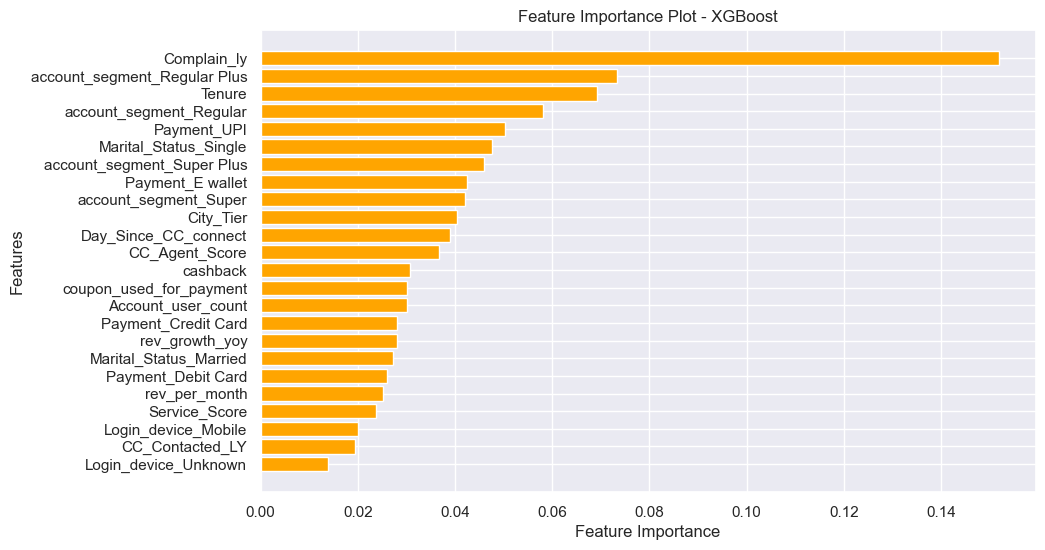

In [195]:
feature_importance = tuned_xgb_3.feature_importances_

# Create a DataFrame to map feature names
feature_names = X_train.columns  # Ensure X_train is a DataFrame with column names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='orange')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot - XGBoost")
plt.gca().invert_yaxis()  # Invert Y-axis to show the most important feature at the top
plt.show()

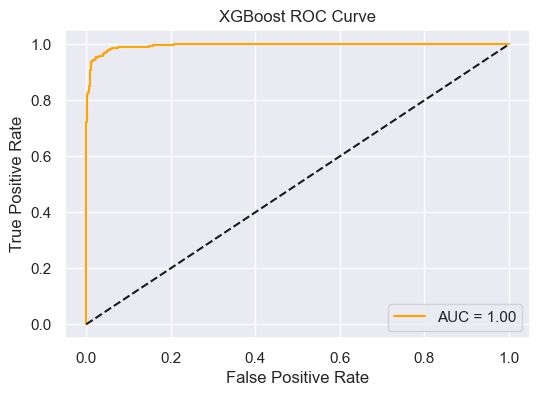

In [196]:
y_probs = tuned_xgb_3.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='orange')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

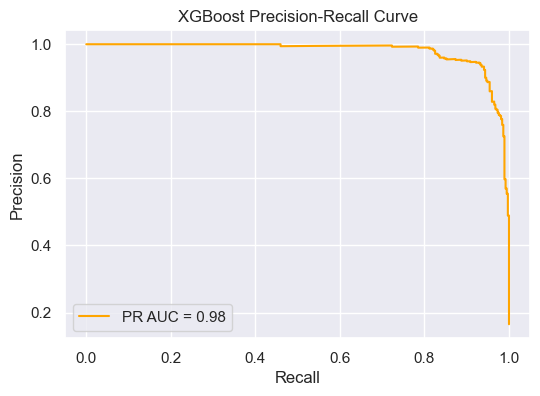

Average Precision Score: 0.98


In [197]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

y_probs = tuned_xgb_3.predict_proba(X_test)[:, 1]  # Probability for class 1

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute AUC for PR Curve
pr_auc = auc(recall, precision)
avg_precision = average_precision_score(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost Precision-Recall Curve')
plt.legend()
plt.show()

# Print Average Precision Score
print(f'Average Precision Score: {avg_precision:.2f}')